## 1) Introduction

Higher brain functions, such as sensory processing, learning, and pattern recognition, cannot be fully understood by focusing on individual neurons. The brain’s extraordinary complexity, with billions of neurons interacting in intricate networks, makes this approach both impractical and insufficient. These functions emerge from the collective dynamics of neural populations, shaped by both local and long-range interactions.

While short-range interactions between neurons may appear random, they contribute to highly coordinated, long-range patterns at the network level. To study this emergent behavior, mean-field models offer a valuable framework by replacing detailed neuron-to-neuron interactions with an averaged representation of population activity. This approach simplifies the study of neural circuits while retaining essential insights into their collective dynamics.

The development of mean-field theory was originated in physics, with foundational contributions by Weiss, Lenz, and Ising. These pioneers provided the basis for models like the Ising model, used to explain complex phenomena such as magnetism in statistical mechanics. In neuroscience, similar principles are applied to understand how populations of excitatory and inhibitory neurons interact, such as those in the cerebellum, where granule cells and Golgi cells coordinate to process information.

By focusing on the collective behavior of neural populations, mean-field models bridge the gap between microscopic neural interactions and the macroscopic processes that underlie brain functions. These models complement more detailed simulations, providing a comprehensive understanding of how local interactions give rise to global brain activity.



## 2) Wilson-Cowan Model

**Understanding the Model:**

The Wilson-Cowan model, provides a simplified framework to study the collective behavior of groups of neurons. It focuses on populations of excitatory and inhibitory neurons within a localized area, aiming to describe how their interactions evolve over time.


**The model assumes that neurons in these populations share two important characteristics:**

1. Close Proximity: The neurons are clustered together spatially, making local interactions dominant.
2. Extensive Connectivity: Dense, random connections ensure all neurons within the population can influence one another, directly or indirectly.

These assumptions justify shifting attention from the spatial relationships between neurons to their shared temporal patterns. Instead of tracking individual spikes, the model emphasizes the proportion of neurons active over a given time frame, characterized by their firing rates.

**Research has provided strong experimental support for these assumptions:**

- Physiological studies have demonstrated that neurons in small regions often respond similarly to identical stimuli.
- Anatomical investigations reveal structural patterns that reinforce this local redundancy.

**Simplification Through Aggregation:**

To make the problem more tractable, the Wilson-Cowan model aggregates neurons of the same type into single representative groups. This process, often called coarse graining, allows researchers to focus on two main subpopulations: one excitatory and one inhibitory.

**These groups interact in specific ways:**


- Excitatory neurons amplify activity within the network.
- Inhibitory neurons act as a counterbalance, dampening activity.

By distilling the system into these two subpopulations, the model captures the essence of their dynamics while avoiding the overwhelming complexity of analyzing individual neural interactions.

**Key Mathematical Insights:**

The activity of the excitatory and inhibitory groups is described through mathematical equations that track their average activity levels over time:

- $E(t)$: Represents the fraction of excitatory neurons active at a given moment.
- $I(t)$: Represents the fraction of inhibitory neurons active at the same moment.

When the system is at rest, activity remains minimal, reflecting a baseline state. The interplay of these variables, influenced by factors such as connection strengths and external inputs, determines how the system transitions between states of activity and quiescence.

The dynamics of the excitatory and inhibitory populations are described by the following equations:

$$
\tau_E \frac{dE(t)}{dt} = -E(t) + S_E \left( c_1 E(t) - c_2 I(t) + P_E(t) \right)
$$

$$
\tau_I \frac{dI(t)}{dt} = -I(t) + S_I \left( c_3 E(t) - c_4 I(t) + P_I(t) \right)
$$
Where:

$$
\tau_E \text{ and } \tau_I: \text{ Time constants for excitatory and inhibitory neurons.}
$$

$$
c_1, c_2, c_3, c_4: \text{ Connection strength parameters.}
$$

$$
P_E(t) \text{ and } P_I(t): \text{ External inputs to the excitatory and inhibitory populations.}
$$

$$
S_E \text{ and } S_I: \text{ Sigmoidal functions representing neuronal response, goven by:}
$$

$$
S_E(x) = \frac{1}{1 + \exp(1.2 \cdot (x - 2.8))} - \frac{1}{1 + \exp(3.36)}
$$

$$
S_I(x) = \frac{1}{1 + \exp(1 \cdot (x - 4))} - \frac{1}{1 + \exp(4)}
$$



## 3) Exploring the Dynamics of the Model

**Objective:**

The goal of this project is to analyze the dynamics of the Wilson-Cowan model by implementing specific tasks (starting from the methods given in the relative lab lecture)

**Our approach:**

We have chosen to work on six major tasks. By leveraging the pre-existing implementation, we aim to streamline the process and concentrate on analyzing the model's behavior under different conditions. This approach will enable us to explore the model's capacity to represent neural population dynamics while interpreting the effects of various parameters and external stimuli.

The selected tasks are as follows:

• **Task 1: Finding the Steady States**

This involves identifying the critical points of the system by plotting the nullcline curves ($ \frac{dE(t)}{dt} = 0 \text{ and } \frac{dI(t)}{dt} = 0 \$) and estimating their intersections using numerical root-finding techniques.

• **Task 2: Classification of Critical Points**

Using the Jacobian matrix, we analyzed whether the identified critical points are attractive or repulsive, providing insight into the system’s stability.

• **Task 3: Change the Non-linearities**

Examined how the critical points changed when modifying the parameters of the non linear functions $S_E$ and $S_I$.

• **Task 4: Modifying Connection Strength Parameters**

We examined how varying the parameters ($ c_1, c_2, c_3, c_4 $) influences the critical points and the overall behavior of the neural populations.

• **Task 5: External Stimulus Effects**

By adding external stimuli ($ P_E(t) \text{ and } P_I(t)$), we explored how the system responds dynamically, simulating and analyzing the resulting neural activity.

• **Task 6: Oscillations**

By testing PE​ values, we aimed to understand the conditions under which oscillatory activity arises.

This focused exploration allowed us to gain deeper insights into the Wilson-Cowan model’s capacity to represent neural population dynamics effectively.




### Evaluation of the Provided Implementation

The GitHub repository Wilson-Cowan Model Implementation offers a comprehensive implementation of the Wilson-Cowan model, a mathematical framework designed to capture the dynamics of excitatory and inhibitory neuron populations. Specifically, this Jupyter Notebook is organized as follows:

#### Step 1: Import Required Libraries
This step involves importing the essential libraries necessary to implement and analyze the Wilson-Cowan model:

In [ ]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.optimize import fsolve

**Explanation of Libraries:**

- *ipywidgets:* Ecreates interactive widgets allowing for dynamic user input.
- *numpy:* Facilitates numerical computations, including operations on arrays and matrices.
- *matplotlib.pyplot:* Provides tools for creating a variety of visualizations, including static and interactive plots.
- *scipy.optimize:* Includes algorithms for optimization and tools like fsolve for solving nonlinear equations.

#### Step 2: Plotting Functions for Model Dynamics
This section defines functions for visualizing various aspects of the Wilson-Cowan model's dynamics:

In [ ]:
def plot_FI_inverse(x, a, theta):
    """
    Plot the inverse of the activation function
    """
    f, ax = plt.subplots()
    ax.plot(x, F_inv(x, a=a, theta=theta))
    ax.set(xlabel="$x$", ylabel="$F^{-1}(x)$")


def plot_FI_EI(x, FI_exc, FI_inh):
    """
    Plot the activation fuction for the E and I populations
    """
    plt.figure()
    plt.plot(x, FI_exc, 'b', label='E population')
    plt.plot(x, FI_inh, 'r', label='I population')
    plt.legend(loc='lower right')
    plt.xlabel('x (a.u.)')
    plt.ylabel('F(x)')
    plt.show()


def my_test_plot(t, rE1, rI1, rE2, rI2):
    """
    Plot activities of E and I population for two different initial conditions
    """

    plt.figure()
    ax1 = plt.subplot(211)
    ax1.plot(pars['range_t'], rE1, 'b', label='E population')
    ax1.plot(pars['range_t'], rI1, 'r', label='I population')
    ax1.set_ylabel('Activity')
    ax1.legend(loc='best')

    ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
    ax2.plot(pars['range_t'], rE2, 'b', label='E population')
    ax2.plot(pars['range_t'], rI2, 'r', label='I population')
    ax2.set_xlabel('t (ms)')
    ax2.set_ylabel('Activity')
    ax2.legend(loc='best')

    plt.tight_layout()
    plt.show()





In [ ]:


def my_plot_trajectory(pars, mycolor, x_init, mylabel):
    """
    Plot a single trajectory in the phase plane, given the initial conditions
    """
    pars = pars.copy()
    pars['rE_init'], pars['rI_init'] = x_init[0], x_init[1]
    rE_tj, rI_tj = simulate_wc(**pars)

    plt.plot(rE_tj, rI_tj, color=mycolor, label=mylabel)
    plt.plot(x_init[0], x_init[1], 'o', color=mycolor, ms=8)
    plt.xlabel(r'$r_E$')
    plt.ylabel(r'$r_I$')


def my_plot_trajectories(pars, dx, n, mylabel):
    """
    Solve for I along the E_grid from dE/dt = 0.

    Expects:
    pars    : Parameter dictionary
    dx      : increment of initial values
    n       : n*n trjectories
    mylabel : label for legend

    Returns: Figure of trajectories
    """

    pars = pars.copy()
    for ie in range(n):
        for ii in range(n):
            pars['rE_init'], pars['rI_init'] = dx * ie, dx * ii
            rE_tj, rI_tj = simulate_wc(**pars)
            if (ie == n-1) & (ii == n-1):
                plt.plot(rE_tj, rI_tj, 'gray', alpha=0.8, label=mylabel)
            else:
                plt.plot(rE_tj, rI_tj, 'gray', alpha=0.8)
    plt.xlabel(r'$r_E$')
    plt.ylabel(r'$r_I$')

- **`plot_FI_inverse`** :  
  Plots the inverse of the activation function $\ F^{-1}(x) $ using the input parameters $  x , a , \text{ and }   θ $, which shape the sigmoid function in the model. This helps in understanding the function's behavior.

- **`plot_FI_EI`**:  
  Visualizes the activation functions for the excitatory (E) and inhibitory (I) populations. The plot illustrates how these populations respond to input, aiding in analyzing their distinct behaviors.

- **`my_test_plot`**:  
  Compares the activities of the excitatory and inhibitory populations under two different initial conditions. This function highlights the dynamics and variations in responses based on starting parameters.

- **`my_plot_trajectory`**: plots a single phase plane trajectory by solving the Wilson-Cowan equations from given initial conditions, marking the start point and labeling the axes.  

- **`my_plot_trajectories`**: plots multiple trajectories from an \( n \times n \) grid of initial conditions to visualize system dynamics, highlighting attractors and stability.

These functions are essential for interpreting the model's behavior and validating its results through graphical representation.


#### Step 3: Helper Functions
This section includes essential helper functions used to define parameters, compute population activation, and simulate the Wilson-Cowan model:

In [ ]:
def default_pars(**kwargs):
    """
    Define the parameters of the dynamical system
    """
    pars = {}

    # Excitatory parameters
    pars['tau_E'] = 1.     # Timescale of the E population [ms]
    pars['a_E'] = 1.2      # Gain of the E population
    pars['theta_E'] = 2.8  # Threshold of the E population

    # Inhibitory parameters
    pars['tau_I'] = 2.0    # Timescale of the I population [ms]
    pars['a_I'] = 1.0      # Gain of the I population
    pars['theta_I'] = 4.0  # Threshold of the I population

    # Connection strength
    pars['wEE'] = 9.   # E to E (c1)
    pars['wEI'] = 4.   # I to E (c2)
    pars['wIE'] = 13.  # E to I (c3)
    pars['wII'] = 11.  # I to I (c4)

    # External input
    pars['I_ext_E'] = 0.
    pars['I_ext_I'] = 0.

    # simulation parameters
    pars['T'] = 50.        # Total duration of simulation [ms]
    pars['dt'] = .1        # Simulation time step [ms]
    pars['rE_init'] = 0.2  # Initial value of E
    pars['rI_init'] = 0.2  # Initial value of I

    # External parameters if any
    for k in kwargs:
        pars[k] = kwargs[k]

    # Vector of discretized time points [ms]
    pars['range_t'] = np.arange(0, pars['T'], pars['dt'])

    return pars


def F(x, a, theta):
    """
    Population activation function, F-I curve

    Args:
        x     : the population input
        a     : the gain of the function
        theta : the threshold of the function

    Returns:
        f     : the population activation response f(x) for input x
    """

    f = (1 + np.exp(-a * (x - theta)))**-1 - (1 + np.exp(a * theta))**-1

    return f


def dF(x, a, theta):
    """
    Derivative of the population activation function.

    Args:
        x     : the population input
        a     : the gain of the function
        theta : the threshold of the function

    Returns:
        dFdx  :  Derivative of the population activation function.
    """

    dFdx = a * np.exp(-a * (x - theta)) * (1 + np.exp(-a * (x - theta)))**-2

    return dFdx


def F_inv(x, a, theta):
    """
    Inverse of the population activation function.
    Args:
        x         : the population input
        a         : the gain of the function
        theta     : the threshold of the function

    Returns:
        F_inverse : value of the inverse function
    """

    # Calculate Finverse (ln(x) can be calculated as np.log(x))
    F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta

    return F_inverse


def EIderivs(rE, rI,tau_E, a_E, theta_E, wEE, wEI, I_ext_E,
             tau_I, a_I, theta_I, wIE, wII, I_ext_I,
             **other_pars):
    """
    Time derivatives for E/I variables (dE/dt, dI/dt).
    """

    drEdt = (-rE + F(wEE * rE - wEI * rI + I_ext_E, a_E, theta_E)) / tau_E
    drIdt = (-rI + F(wIE * rE - wII * rI + I_ext_I, a_I, theta_I)) / tau_I

    return drEdt, drIdt

def simulate_wc(tau_E, a_E, theta_E, tau_I, a_I, theta_I,
                wEE, wEI, wIE, wII, I_ext_E, I_ext_I,
                rE_init, rI_init, dt, range_t, **other_pars):
    """
    Simulate the Wilson-Cowan equations

    Args:
        Parameters of the Wilson-Cowan model

    Returns:
        rE, rI (arrays) : Activity of excitatory and inhibitory populations
    """
    # Initialize activity arrays
    Lt = range_t.size
    rE = np.append(rE_init, np.zeros(Lt - 1))
    rI = np.append(rI_init, np.zeros(Lt - 1))
    I_ext_E = I_ext_E * np.ones(Lt)
    I_ext_I = I_ext_I * np.ones(Lt)

    # Simulate the Wilson-Cowan equations
    for k in range(Lt - 1):

        # Calculate the derivative of the E population
        drE = dt / tau_E * (-rE[k] + F(wEE * rE[k] - wEI * rI[k] + I_ext_E[k],
                                   a_E, theta_E))

        # Calculate the derivative of the I population
        drI = dt / tau_I * (-rI[k] + F(wIE * rE[k] - wII * rI[k] + I_ext_I[k],
                                   a_I, theta_I))

        # Update using Euler's method
        rE[k + 1] = rE[k] + drE
        rI[k + 1] = rI[k] + drI

    return rE, rI

- **`default_pars`** : Initializes the parameters of the Wilson-Cowan model, such as time constants, coupling strengths, and external inputs. It also supports parameter customization through optional arguments, ensuring flexibility in configuration.
- **`F`** : The sigmoid activation function that describes how neural population activity responds to input. It is governed by parameters like gain $ a $ and threshold   $θ $.
- **`F_inv`** : Calculates the inverse of the sigmoid activation function. This is useful for analyzing and visualizing activation thresholds.
- **`simulate_wc`** : Implements the simulation of the Wilson-Cowan equations using Euler's method. It computes the activity dynamics of excitatory and inhibitory populations over time and returns the corresponding activity arrays.



#### Step 4: Simulating Population Activity
This section uses the Wilson-Cowan model to simulate and compare the activity of excitatory (E) and inhibitory (I) populations under two different initial conditions.

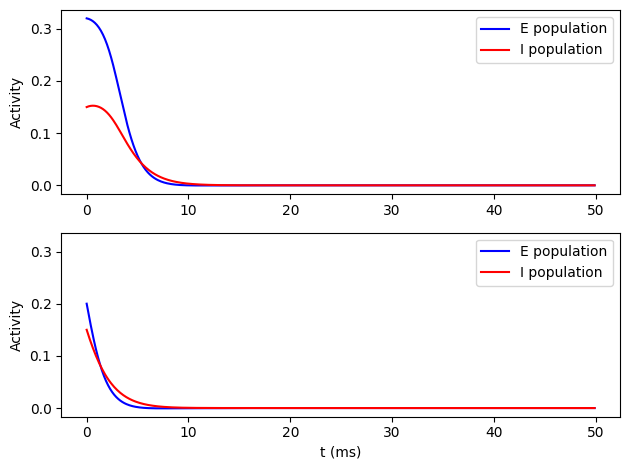

In [ ]:
pars = default_pars()


# Simulate first trajectory
rE1, rI1 = simulate_wc(**default_pars(rE_init=.32, rI_init=.15))

# Simulate second trajectory
rE2, rI2 = simulate_wc(**default_pars(rE_init=.2, rI_init=.15))

"""
# Simulate first trajectory
rE1, rI1 = simulate_wc(**default_pars(rE_init=.32, rI_init=.15),wEE=6.4,wEI=4.8,wIE=6.0,WII=1.2)

# Simulate second trajectory
rE2, rI2 = simulate_wc(**default_pars(rE_init=.2, rI_init=.15))
"""

my_test_plot(pars['range_t'], rE1, rI1, rE2, rI2)

- **`pars`** : Initializes the default parameters for the simulation, such as time constants, coupling strengths, and external inputs.
- **`Simulate first trajectory`** :  Runs the simulation with initial conditions $ r_E(0)=0.32  \text{  and  } r_I(0)=0.15 $, storing the results in `rE1` (excitatory activity) and `rI1` (inhibitory activity).
- **`Simulate second trajectory`**: Runs the simulation with slightly different initial conditions $ r_E(0)=0.2 \text{  and  } r_I(0)=0.15 $, storing the results in `rE2` and `rI2`.
- **`my_test_plot`**: Plots the activity of excitatory and inhibitory populations for both sets of initial conditions, enabling a comparison of their dynamics.

**Top plot:** Shows the activity of the excitatory (blue) and inhibitory (red) populations starting with initial conditions $ r_E(0)=0.32  \text{  and  } r_I(0)=0.15 $. The excitatory population initially exhibits higher activity but quickly stabilizes to a lower level. Similarly, the inhibitory population gradually decays to its steady state, reflecting the model's damped dynamics.

**Bottom plot:** Depicts the activity under initial conditions $ r_E(0)=0.2 \text{  and  } r_I(0)=0.15 $. Both populations settle into similar steady states as the first trajectory but with slightly different transient behavior, demonstrating the system's robustness to varying initial conditions.

These plots illustrate how the Wilson-Cowan model captures the dynamic interaction between excitatory and inhibitory populations, with both trajectories converging to a stable steady state. The differences in initial conditions only affect the transient phase, not the final equilibrium.

## Tasks

### **Task 1 - Find the steady states**
**Objective:**

The goal of this task is to identify the steady states of the Wilson-Cowan model by locating the intersection points of the excitatory (E) and inhibitory (I) nullclines, setting  c1 = 9, c2 = 4, c3 = 13 and c4 = 11 . These nullclines represent the regions in the phase space where the rates of change of $ E \text{ and } I  ( \frac{dE(t)}{dt} \text{ and } \frac{dI(t)}{dt}) $ are zero, indicating equilibrium points.

**Approach:**

1. **Define nullclines:**
- The `nullcline_E` function computes the inhibitory response ($ r_I $)
as a function of the excitatory population's response ($ r_E $) along the excitatory nullcline.
- The `nullcline_I` function calculates the excitatory response ($ r_E $) as a function of the inhibitory response ($ r_I $) along the inhibitory nullcline.

2. **Plotting Nullclines:**
- The nullclines are computed over a range of possible responses for both excitatory ($ r_E $) and inhibitory ($ r_I $) populations.
- These are plotted to visualize the phase space and identify potential intersections.

3. **Finding Intersection Points:**
- The `nullcline_difference` function is defined to calculate the deviations of given ($ r_E $) and ($ r_I $) values from their respective nullclines.
- Using the `fsolve` function, the system identifies the points where these differences are zero, representing steady state


**Finding the Nullclines**

The Wilson-Cowan model is described by the following system of differential equations:

$$
\tau_E \frac{dE}{dt} = -E + S_E ( c_1 E - c_2 I + P_E )
$$

$$
\tau_I \frac{dI}{dt} = -I + S_I ( c_3 E - c_4 I + P_I )
$$

The nullclines are obtained by setting the time derivatives to zero:

$$
E = S_E ( c_1 E - c_2 I + P_E )
$$

$$
I = S_I ( c_3 E - c_4 I + P_I )
$$


For the given parameters, the nullcline equations become:

$$
E = S_E ( 9E - 4I + P_E )
$$

$$
I = S_I ( 13E - 11I + P_I )
$$

These equations define the equilibrium points of the system, where the population activities of excitatory and inhibitory neurons remain constant over time. The equilibrium points are found at the intersections of these two nullcline curves.

In [ ]:
def nullcline_E(rE, a_E, theta_E, wEE, wEI, I_ext_E, **other_pars):
    """
    Calculate the inhibitory response (rI) at the nullcline where the change in the excitatory
    response (rE) over time is zero, indicating a steady state.

    Args:
        rE (float): Current response of the excitatory neural population.
        a_E (float): Parameter of the activation function for excitatory neurons, possibly max firing rate.
        theta_E (float): Threshold parameter of the activation function for excitatory neurons.
        wEE (float): Weight of excitatory to excitatory neuron interaction.
        wEI (float): Weight of excitatory to inhibitory neuron interaction.
        I_ext_E (float): External input to the excitatory population.
        **other_pars: Additional parameters that might be needed for extended models or future use.

    Returns:
        float: Computed inhibitory population response (rI) along the excitatory nullcline.
    """
    # Calculate rI using the Wilson-Cowan model components:
    # 1. wEE * rE: Represents the contribution of excitatory population to itself.
    # 2. F_inv(rE, a_E, theta_E): Inverse activation function adjusting excitatory impact.
    # 3. I_ext_E: External influence on the excitatory population.
    # The result is scaled by the reciprocal of wEI to adjust for inhibitory influence.
    rI = (wEE * rE - F_inv(rE, a_E, theta_E) + I_ext_E) / wEI
    return rI




Then we define the `nullcline_I` function wich calculates the excitatory population response, denoted as `rE`, based on parameters describing the inhibitory population. This function is a part of a neuronal population model that is similarly influenced by the Wilson-Cowan framework, which is essential for understanding the dynamics between inhibitory and excitatory neural populations.


This function is specifically designed to compute the excitatory response `rE` along what is termed as the "nullcline" for the inhibitory population `rI`. In dynamical systems theory, a nullcline represents a set of points in the phase space where the rate of change of a variable (here `rI`) is zero. Therefore, along this curve, the inhibitory population is in a steady state, neither increasing nor decreasing.

The key computation within the function is:

```python
rE = (wII * rI + F_inv(rI, a_I, theta_I) - I_ext_I) / wIE


In [ ]:
def nullcline_I(rI, a_I, theta_I, wIE, wII, I_ext_I, **other_pars):
    """
    Calculate the excitatory response (rE) at the nullcline where the change in the inhibitory
    response (rI) over time is zero, indicating a steady state.

    Args:
        rI (float): Current response of the inhibitory neural population.
        a_I (float): Parameter of the activation function for inhibitory neurons, possibly max firing rate.
        theta_I (float): Threshold parameter of the activation function for inhibitory neurons.
        wIE (float): Weight of inhibitory to excitatory neuron interaction.
        wII (float): Weight of inhibitory to inhibitory neuron interaction.
        I_ext_I (float): External input to the inhibitory population.
        **other_pars: Additional parameters that might be needed for extended models or future use.

    Returns:
        float: Computed excitatory population response (rE) along the inhibitory nullcline.
    """
    # Calculate rE using the Wilson-Cowan model components:
    # 1. wII * rI: Represents the contribution of the inhibitory population to itself.
    # 2. F_inv(rI, a_I, theta_I): Inverse activation function adjusting inhibitory impact.
    # 3. I_ext_I: External influence on the inhibitory population.
    # The result is scaled by the reciprocal of wIE to adjust for excitatory influence.
    rE = (wII * rI + F_inv(rI, a_I, theta_I) - I_ext_I) / wIE

    return rE


<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


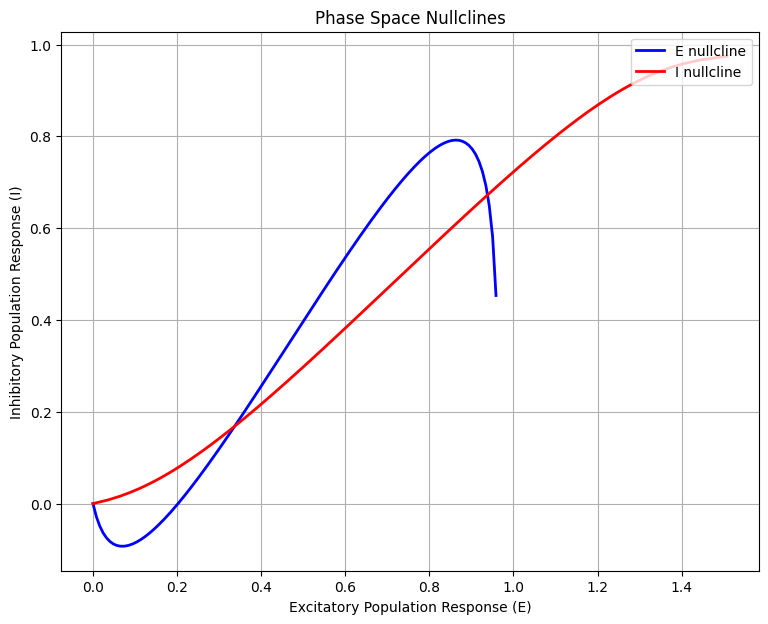

In [ ]:
# Generate response ranges with slightly different limits and more points for higher resolution
Exc_null_rE = np.linspace(0, 1.2, 150)  # Extended range and increased points
Inh_null_rI = np.linspace(0, 1.2, 150)

# Calculate nullclines using the predefined functions and parameter set `pars`
# Assume 'pars' has been defined earlier or passed to this script
Exc_null_rI = nullcline_E(Exc_null_rE, **pars)
Inh_null_rE = nullcline_I(Inh_null_rI, **pars)

# Plotting
plt.figure(figsize=(9, 7))  # Slightly larger figure size for better visibility
plt.plot(Exc_null_rE, Exc_null_rI, 'blue', label='E nullcline', linewidth=2)  # Change color to blue and increase line width
plt.plot(Inh_null_rE, Inh_null_rI, 'red', label='I nullcline', linewidth=2)  # Change color to magenta

# Labels and legends
plt.xlabel('Excitatory Population Response (E)')
plt.ylabel('Inhibitory Population Response (I)')
plt.title('Phase Space Nullclines')  # Add a title to the plot
plt.legend(loc='upper right')  # Adjust legend location
plt.grid(True)  # Add grid lines for better readability of the plot

plt.show()


**Phase Space Nullclines Plot**

This plot displays the nullclines of the excitatory and inhibitory populations:

- The blue curve represents the excitatory nullcline, where $ \frac{dE(t)}{dt} = 0 $.
- The red curve represents the inhibitory nullcline, where $ \frac{dI(t)}{dt} = 0 $.

The `nullcline_difference` function calculates the deviations of neuronal responses from their respective nullclines in a dynamical system of excitatory and inhibitory populations. These deviations are critical for analyzing the stability and dynamics of neural networks, particularly in the Wilson-Cowan model.


Parameters

- `r` (tuple): The excitatory (`rE`) and inhibitory (`rI`) responses.
- `*args`: A collection of parameters required to compute the nullclines, including activation properties, synaptic weights, and external inputs.

Outputs

- `diff_E`: The difference between the excitatory nullcline and the actual inhibitory response.
- `diff_I`: The difference between the inhibitory nullcline and the actual excitatory response.


This function is employed to evaluate the distance from the nullclines, which is essential for assessing the system's stability and identifying potential dynamic changes. It aims in highlighting points where the system may either reach equilibrium or undergo significant dynamic transitions.


In [ ]:
def nullcline_difference(r, *args):
    """
    Calculate the differences from the nullclines of the excitatory and inhibitory populations.

    This function computes the deviation of a given excitatory and inhibitory response pair (rE, rI)
    from their respective nullclines. These deviations are important for analyzing stability and
    convergence in dynamical systems modeling neural populations.

    Args:
        r (tuple): Tuple containing the excitatory (rE) and inhibitory (rI) responses.
        *args: A sequence of parameters including:
               a_E, theta_E (activation parameters for E population),
               wEE, wEI (interaction weights for E population),
               I_ext_E (external input to E population),
               a_I, theta_I (activation parameters for I population),
               wIE, wII (interaction weights for I population),
               I_ext_I (external input to I population).

    Returns:
        list: Differences [diff_E, diff_I] where
              diff_E = nullcline value for E - actual inhibitory response (rI),
              diff_I = nullcline value for I - actual excitatory response (rE).
    """
    rE, rI = r  # Unpack response values
    # Unpack all parameters needed for nullcline calculations
    a_E, theta_E, wEE, wEI, I_ext_E, a_I, theta_I, wIE, wII, I_ext_I = args

    # Calculate the deviation from the nullcline for excitatory population
    diff_E = nullcline_E(rE, a_E, theta_E, wEE, wEI, I_ext_E) - rI
    # Calculate the deviation from the nullcline for inhibitory population
    diff_I = nullcline_I(rI, a_I, theta_I, wIE, wII, I_ext_I) - rE

    return [diff_E, diff_I]


<ipython-input-88-1213f8ca075f>:12: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  intersection_points = [fsolve(nullcline_difference, guess, args=args) for guess in initial_guesses]


Intersection point 1 (rE, rI): [0.33685241 0.16841968]
Intersection point 2 (rE, rI): [2.29438927e-17 5.55472456e-18]
Intersection point 3 (rE, rI): [0.93843047 0.67248104]


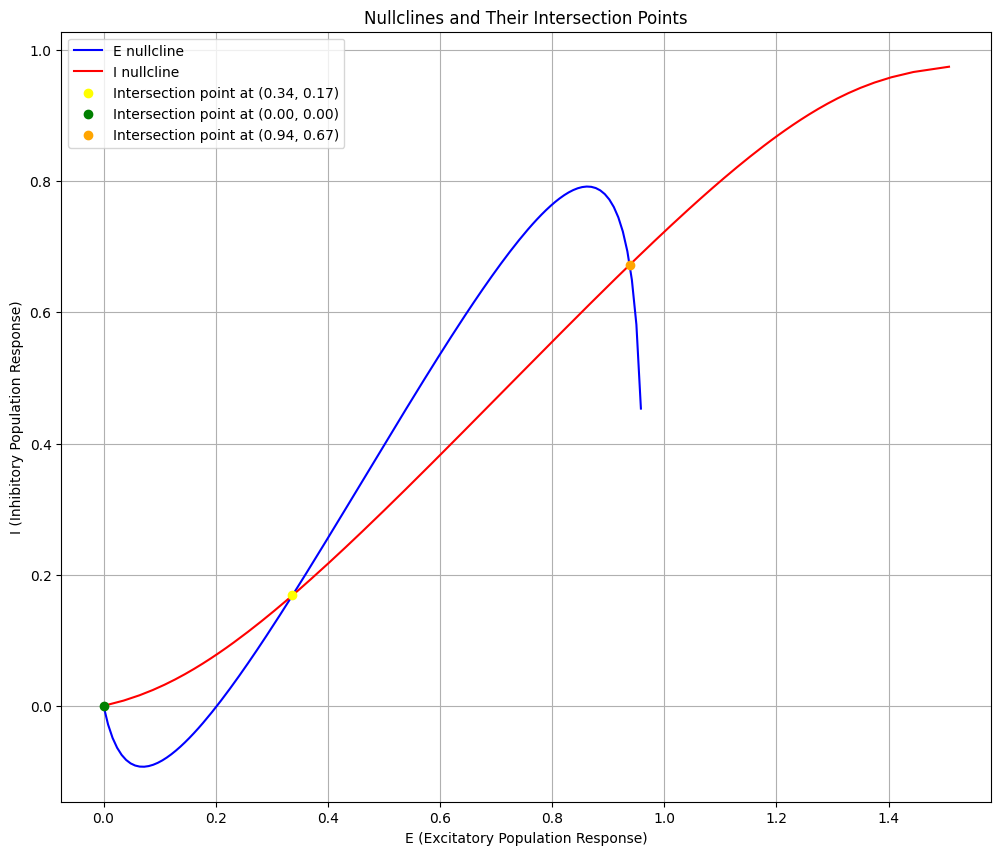

In [ ]:
# Parameters for root finding - Starting points for the search
initial_guesses = [
    [0.3, 0.3],
    [0.01, 0.01],
    [0.9, 0.8]
]

args = (pars['a_E'], pars['theta_E'], pars['wEE'], pars['wEI'], pars['I_ext_E'],
        pars['a_I'], pars['theta_I'], pars['wIE'], pars['wII'], pars['I_ext_I'])

# Find the intersection points using fsolve
intersection_points = [fsolve(nullcline_difference, guess, args=args) for guess in initial_guesses]

# Printing intersection points
for idx, point in enumerate(intersection_points, start=1):
    print(f"Intersection point {idx} (rE, rI): {point}")

# Plotting
plt.figure(figsize=(12, 10))
plt.plot(Exc_null_rE, Exc_null_rI, 'blue', label='E nullcline')
plt.plot(Inh_null_rE, Inh_null_rI, 'red', label='I nullcline')

colors = ['yellow', 'green', 'orange']  # Colors for the intersection points
for point, color in zip(intersection_points, colors):
    plt.scatter(point[0], point[1], color=color, zorder=5, label=f'Intersection point at ({point[0]:.2f}, {point[1]:.2f})')

plt.xlabel('E (Excitatory Population Response)')
plt.ylabel('I (Inhibitory Population Response)')
plt.title('Nullclines and Their Intersection Points')
plt.legend(loc='best')
plt.grid(True)
plt.show()


**Nullclines and Intersection Points Plot:**

This plot highlights the nullclines along with the intersection points:

- The steady states are marked as colored points at the intersections of the nullclines. Each point corresponds to specific values of $ r_E $ and $ r_I $.
- The plot provides detailed coordinates for each intersection, helping to quantify the steady states' location.

###**Task 2 - Classification of the critical points**

**Objective:**

Critical points can be attractive or repulsive. We classify the nature of the critical
point(s) found in Task 1 using the Jacobian matrix of the dynamical system.

**Approach:**

To determine stability, we analyze the eigenvalues of the **Jacobian matrix** at each fixed point. We define the function `get_eigen_J`, which computes these eigenvalues based on:

* Fixed point coordinates ($r_E$, $r_I$)
* Time constants ($τ_E$, $τ_I$)
* Activation function parameters ($a_E$, $a_I$, $θ_E$, $θ_I$)  
* Synaptic weights ($wEE$, $wEI$, $wIE$, $wII$)
* External inputs ($Iext$, $Eext$)

The stability classification follows these criteria:

* **Positive eigenvalues → Unstable (Repulsive)**: Small perturbations grow, potentially leading to oscillations or complex dynamics (system moves away from balance).
* **Negative eigenvalues → Stable (Attractive)**: Small perturbations decay, bringing the system back to equilibrium (systems returns to balance).

This analysis helps characterize the dynamical behavior of the neural populations. In other words, we classify each critical point and understand how the system reacts near these points: whether it settles into a steady state or behaves unpredictably.


The Jacobian matrix describes how the system changes in the nearance to a critical point. For the Wilson-Cowan model, this is a 2x2 matrix with the partial derivatives of the equations with repsect to E and I:

$$
J(E, I) =
\begin{bmatrix}
\frac{\partial f_E}{\partial E} & \frac{\partial f_E}{\partial I} \\
\frac{\partial f_I}{\partial E} & \frac{\partial f_I}{\partial I}
\end{bmatrix}
$$

Where:

- $ f_E(E, I) = -E + S_E(9E - 4I + P_E) $
- $ f_I(E, I) = -I + S_I(13E - 11I + P_I) $

These derivatives evaluate the sensitivity of the system to changes around the critical points.


In [ ]:
def get_eigen_J(fp, tau_E, a_E, theta_E, wEE, wEI, I_ext_E, tau_I, a_I, theta_I, wIE, wII, I_ext_I, **other_pars):
    """
    Compute eigenvalues of the Wilson-Cowan Jacobian matrix at a fixed point.

    Args:
        fp (tuple): Fixed point coordinates (rE, rI).
        tau_E, tau_I (float): Time constants for excitatory and inhibitory populations.
        a_E, a_I (float): Parameters affecting the shape of the activation function for E and I populations.
        theta_E, theta_I (float): Threshold parameters for the activation functions.
        wEE, wEI, wIE, wII (float): Weight parameters describing connections within and between E and I populations.
        I_ext_E, I_ext_I (float): External inputs to the E and I populations.
        **other_pars: Additional parameters that might be relevant for extended models.

    Returns:
        numpy.ndarray: Eigenvalues of the Jacobian matrix at the given fixed point.
    """
    # Unpack the fixed point
    rE, rI = fp

    # Initialize the Jacobian matrix
    J = np.zeros((2, 2))

    # Calculate the influence of the excitatory and inhibitory populations
    net_input_E = wEE * rE - wEI * rI + I_ext_E
    net_input_I = wIE * rE - wII * rI + I_ext_I

    # Derivative functions, assumed to be provided or defined elsewhere
    # These could potentially use sigmoid functions or other types depending on model specifics
    derivative_E = dF(net_input_E, a_E, theta_E)
    derivative_I = dF(net_input_I, a_I, theta_I)

    # Fill the Jacobian matrix with appropriate derivatives
    J[0, 0] = (-1 + wEE * derivative_E) / tau_E
    J[0, 1] = (-wEI * derivative_E) / tau_E
    J[1, 0] = (wIE * derivative_I) / tau_I
    J[1, 1] = (-1 - wII * derivative_I) / tau_I

    # Compute and return the eigenvalues of the Jacobian matrix
    evals = np.linalg.eigvals(J)
    return evals


In [ ]:
# Obtain eigenvalues for each intersection point using list comprehension
eigenvalues_list = [get_eigen_J(point, **pars) for point in intersection_points]

# Using intersection_points directly since they correspond to aList in your original snippet
for point, eigenvalues in zip(intersection_points, eigenvalues_list):
    real_parts = np.real(eigenvalues)
    if all(real_parts < 0):
        print(f"The Critical Point {point} = {eigenvalues} is stable Attractive")
    elif any(real_parts > 0):
        print(f"The Critical Point {point} = {eigenvalues} is unstable Repulsive")
    else:
        print(f"The Critical Point {point} = {eigenvalues} is neutral or non-hyperbolic")

The Critical Point [0.33685241 0.16841968] = [ 1.05720798 -0.87266898] is unstable Repulsive
The Critical Point [2.29438927e-17 5.55472456e-18] = [-0.62338386+0.13110957j -0.62338386-0.13110957j] is stable Attractive
The Critical Point [0.93843047 0.67248104] = [-0.95956219 -1.42197413] is stable Attractive


The stability of the critical points is determined by analyzing the eigenvalues of the Jacobian matrix at those points:

- The first critical point shows unstable (repulsive) behaviour, given by the positive real part, indicating that trajectories near this point will diverge in at least one direction.
- The other two critical points show stable (attractive) behaviours, the eigenvalues have negative real parts with complex components. This means the point is stable, as trajectories spiral inwards towards the critical point.


In [ ]:
def system_derivatives(rE, rI, tau_E, a_E, theta_E, wEE, wEI, I_ext_E,
                       tau_I, a_I, theta_I, wIE, wII, I_ext_I, **other_pars):
    """
    Calculate the time derivatives of the excitatory and inhibitory populations
    in the Wilson-Cowan model.

    Parameters:
    - rE, rI (float): Current response rates of excitatory and inhibitory neurons.
    - tau_E, tau_I (float): Time constants for excitatory and inhibitory neurons.
    - a_E, a_I (float): Maximum firing rates of excitatory and inhibitory neurons.
    - theta_E, theta_I (float): Thresholds for excitatory and inhibitory neurons activation.
    - wEE, wEI, wIE, wII (float): Weights representing synaptic connections between neurons.
    - I_ext_E, I_ext_I (float): External inputs to excitatory and inhibitory neurons.
    - **other_pars: Dictionary to pass additional parameters for flexibility.

    Returns:
    - numpy.ndarray: Derivatives of excitatory and inhibitory neuron responses.
    """
    # Input net to excitatory and inhibitory neurons
    net_input_E = wEE * rE - wEI * rI + I_ext_E
    net_input_I = wIE * rE - wII * rI + I_ext_I

    # Activation functions applied to net inputs
    activation_E = F(net_input_E, a_E, theta_E)
    activation_I = F(net_input_I, a_I, theta_I)

    # Time derivatives of neuron responses
    drEdt = (-rE + activation_E) / tau_E
    drIdt = (-rI + activation_I) / tau_I

    return np.array([drEdt, drIdt])


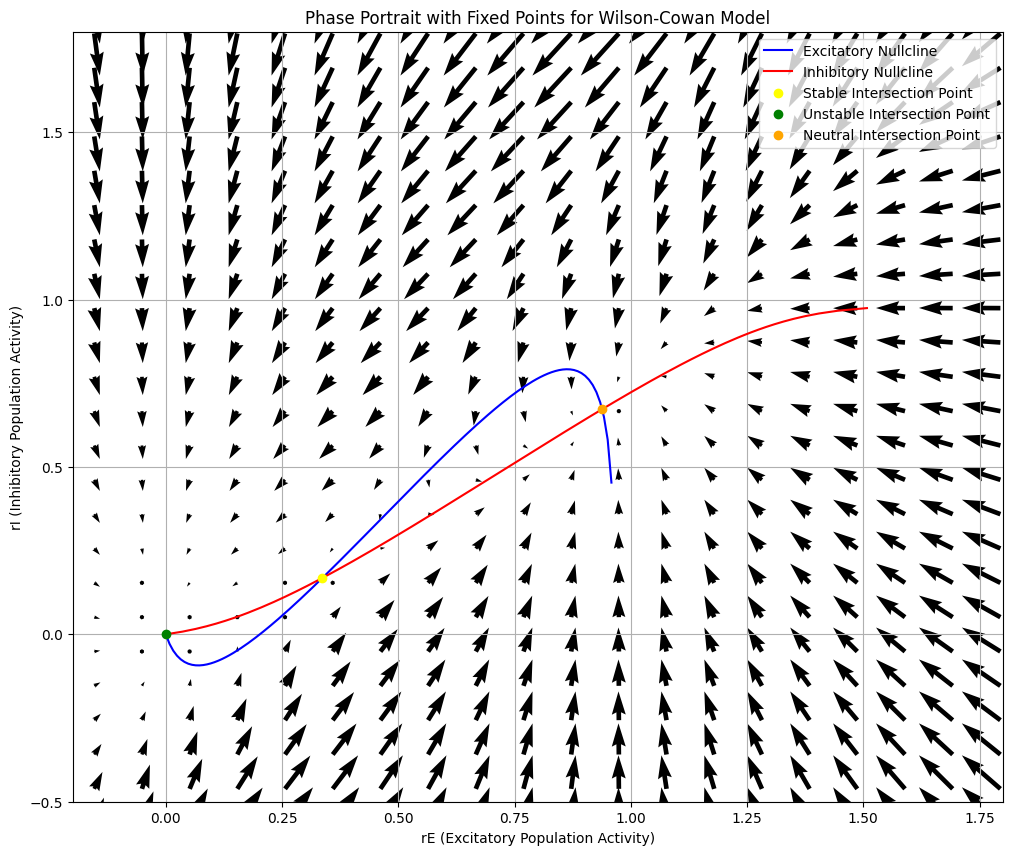

In [ ]:

plt.figure(figsize=(12, 10))

# Generate a grid over which to calculate the derivatives
x, y = np.meshgrid(np.linspace(-2, 2, 40), np.linspace(-2, 2, 40))

# Initialize arrays to store the derivatives at each grid point
u, v = np.zeros(x.shape), np.zeros(y.shape)
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        derivatives = system_derivatives(x[i, j], y[i, j], **pars)
        u[i, j], v[i, j] = derivatives

# Plot the vector field
plt.quiver(x, y, u, v, color='black', scale=20, width=0.005)

# Assuming Exc_null_rE and Inh_null_rI are already defined and store the nullcline data
plt.plot(Exc_null_rE, Exc_null_rI, 'blue', label='Excitatory Nullcline')
plt.plot(Inh_null_rE, Inh_null_rI, 'red', label='Inhibitory Nullcline')

# Plot each intersection point using details from the 'intersection_points' list
colors = ['yellow', 'green', 'orange']
labels = ['Stable Intersection Point', 'Unstable Intersection Point', 'Neutral Intersection Point']
for idx, point in enumerate(intersection_points):
    if idx < len(colors):  # Check to prevent index errors if there are more points than colors
        plt.scatter(point[0], point[1], color=colors[idx], zorder=5, label=labels[idx], marker='o')

# Set plot limits, labels, and title for better visualization
plt.xlim([-0.2, 1.8])
plt.ylim([-0.5, 1.8])
plt.xlabel('rE (Excitatory Population Activity)')
plt.ylabel('rI (Inhibitory Population Activity)')
plt.title('Phase Portrait with Fixed Points for Wilson-Cowan Model')
plt.legend()
plt.grid(True)
plt.show()

**Results of Stability Analysis for Critical Points:**

The stability of critical points in the Wilson-Cowan model was evaluated using a phase portrait analysis. Here are the results, which include the coordinates of each critical point, their corresponding eigenvalues, and the inferred stability type.
 1. Critical Point:
- **Eigenvalues**: [1.05727098, -0.87266898]
- **Stability**: Unstable (Repulsive)
- **Interpretation**: This point has eigenvalues with mixed signs, indicating a saddle point. Although typically considered unstable, saddle points attract trajectories in some directions and repel them in others.


 2. Critical Point:
- **Eigenvalues**: [-0.62338386 + 0.13110957j, -0.62338386 - 0.13110957j]
- **Stability**: Stable (Attractive)
- **Interpretation**: Both eigenvalues are complex with negative real parts, suggesting a stable focus. Small perturbations around this point result in oscillatory decay back to the point, indicating stability with periodic behavior.


 3. Critical Point:
- **Eigenvalues**: [-0.95956219, -1.42197413]
- **Stability**: Stable (Attractive)
- **Interpretation**: Both eigenvalues are negative and real, indicating a node that is purely stable. Perturbations around this point decay smoothly back to it, reinforcing the system's return to stability.

The analysis of the critical points provides essential insights into the dynamic behavior of the Wilson-Cowan model under varying conditions. The presence of both stable and unstable points within the system landscape helps to understand potential response patterns and the resilience of the system against perturbations. This information is crucial for further theoretical and practical applications, including control strategies and understanding of neural dynamics.

###**Task 3  - Change the nonlinearities**
**Objective:**

What happens to the critical points if we change the five parameters (the numbers appearing in the exponentials) of the nonlinear functions $S_E$ and $S_I$?
We simulate and plot the activity of the population with different choices.

**Approach:**

We aim to simulate and analyze how changes in the gain and threshold parameters influence neural population dynamics. These parameters govern the responsiveness of excitatory and inhibitory populations to input signals. By systematically varying them, we explore the resulting shifts in activity and stability.

The parameters inside the exponentials affect how sharply the function transitions from low to high activity.
Specifically, we are changing the gain (steepness) and threshold (shift along the x-axis) of these functions.

The typical form of the activation functions in the Wilson-Cowan model is:

$$
S_E(x) = \frac{1}{1 + \exp(a_E \cdot (E - 𝜃_E))}
$$

$$
S_I(x) = \frac{1}{1 + \exp(a_I \cdot (I - 𝜃_I))}
$$

Where:

* $ a_E$ and $a_I$ are **gain parameters**: they control how quickly the function moves from low to high activity.

* $𝜃_E$ and $𝜃_I$ are **threshold parameters**: they determine the input level at which activation significantly increases.


**Inclusion of Phase Diagrams:**

To gain a deeper understanding of how these parameter changes influence the system, we also analyze phase diagrams alongside time series plots. The nullclines in the phase plane provide insights into how the equilibrium points shift and whether the system remains stable or transitions to different activity states. The vector field representation highlights trajectory patterns, so we can assess if the system converges to a stable state or exhibits oscillatory behavior. By including phase diagrams, we can better interpret the mechanisms driving the system's reactivity and stability under different gain and threshold settings.

#### Case 1: Exploring Gain Adjustments ($a_E$, $a_I$)

The gain parameters, $a_E$ and $a_I$, represent the maximum firing rates of the excitatory and inhibitory populations, respectively. Changing these parameters modifies the steepness of the response curve, affecting how rapidly the populations react to input intensity.

#### Parameter Adjustments:
- **Default values**: $a_E = 1.2$, $a_I = 1.0$
- **Increase**: $a_E$ raised to $2.3$ and then $3.7$; $a_I$ increased to $2.0$ and then $3.3$
- **Decrease**: $a_E$ lowered to $0.4$, $0.09$, and finally $0.01$;  $a_I$ reduced to $0.1$ and tested with $a_I = 1.0$

#### Expected Effects:
- **Increasing the Gain**: Raising $a_E$ and $a_I$ makes the response curve steeper, causing the populations to react more strongly to small changes in input. This heightened sensitivity may lead to quicker transitions between low and high activity states, with potential increases in oscillatory behavior or bistability.


- **Decreasing the Gain**: Lowering $a_E$ and $a_I$ flattens the response curve, making the populations less sensitive to input changes. This reduced responsiveness stabilizes the system and results in smoother, more gradual transitions between activity levels.


> HIGHER GAIN

In [ ]:


def my_phase_plane(pars):
    """
    Plots the phase plane with nullclines, vector field, and sample trajectories.
    """
    pars = pars.copy()

    # Define grid for phase space
    E_vals = np.linspace(0, 1.2, 20)
    I_vals = np.linspace(0, 1.2, 20)
    E_mesh, I_mesh = np.meshgrid(E_vals, I_vals)

    # Compute derivatives for vector field
    dE_dt = -E_mesh + 1 / (1 + np.exp(pars['a_E'] * (9 * E_mesh - 4 * I_mesh - pars['theta_E'])))
    dI_dt = -I_mesh + 1 / (1 + np.exp(pars['a_I'] * (13 * E_mesh - 11 * I_mesh - pars['theta_I'])))

    # Plot vector field
    plt.figure(figsize=(8, 6))
    plt.quiver(E_mesh, I_mesh, dE_dt, dI_dt, color='gray', alpha=0.5)

    # Compute nullclines
    excitatory_range = np.linspace(0, 1, 100)
    inhibitory_range = np.linspace(0, 1, 100)
    nullcline_E_curve = 1 / (1 + np.exp(pars['a_E'] * (9 * excitatory_range - 4 * inhibitory_range - pars['theta_E'])))
    nullcline_I_curve = 1 / (1 + np.exp(pars['a_I'] * (13 * excitatory_range - 11 * inhibitory_range - pars['theta_I'])))

    # Plot nullclines
    plt.plot(excitatory_range, nullcline_E_curve, 'b', label="E Nullcline")
    plt.plot(nullcline_I_curve, inhibitory_range, 'r', label="I Nullcline")

    # Plot trajectories using your function
    my_plot_trajectories(pars, dx=0.2, n=6, mylabel="Trajectories")

    # Highlight specific trajectories
    my_plot_trajectory(pars, 'orange', [0.2, 0.2], 'Low activity')
    my_plot_trajectory(pars, 'm', [0.4, 0.1], 'High activity')
    my_plot_trajectory(pars, 'b', [0.33, 0.17], 'Mid-range activity')

    # Labels and legend
    plt.xlabel("Excitatory Population (E)")
    plt.ylabel("Inhibitory Population (I)")
    plt.title("Phase Plane with Nonlinearity Modifications")
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
def test_higher_gain(new_a_E, new_a_I, parameters):
    # Create a copy of the parameters to protect the original data
    params_copy = dict(parameters)
    params_copy['a_E'], params_copy['a_I'] = new_a_E, new_a_I

    # Define ranges for nullclines
    excitatory_range = np.linspace(-0.01, 1, 100)
    inhibitory_range = np.linspace(-0.01, 1, 100)

    # Calculate nullclines using the updated parameters
    nullcline_inhibitory_for_excitatory = nullcline_E(excitatory_range, **{key: params_copy[key] for key in ['a_E', 'theta_E', 'wEE', 'wEI', 'I_ext_E']})
    nullcline_excitatory_for_inhibitory = nullcline_I(inhibitory_range, **{key: params_copy[key] for key in ['a_I', 'theta_I', 'wIE', 'wII', 'I_ext_I']})

    # Solve for the intersection point of the nullclines
    solve_args = (params_copy['a_E'], params_copy['theta_E'], params_copy['wEE'], params_copy['wEI'], params_copy['I_ext_E'],
                  params_copy['a_I'], params_copy['theta_I'], params_copy['wIE'], params_copy['wII'], params_copy['I_ext_I'])
    initial_guess = [0.3, 0]
    intersection_point = fsolve(nullcline_difference, initial_guess, args=solve_args)

    # Perform stability analysis
    eigenvalues = get_eigen_J(intersection_point, **params_copy)
    if np.all(np.real(eigenvalues) < 0):
        print(f"Stable Critical Point at {intersection_point} with Eigenvalues {eigenvalues}")
    else:
        print(f"Unstable Critical Point at {intersection_point} with Eigenvalues {eigenvalues}")

    # Simulate the system dynamics using the updated parameters
    simulation_args = {key: params_copy[key] for key in ['tau_E', 'a_E', 'theta_E', 'tau_I', 'a_I', 'theta_I', 'wEE', 'wEI', 'wIE', 'wII', 'I_ext_E', 'I_ext_I']}
    trajectory_rE1, trajectory_rI1 = simulate_wc(**simulation_args, rE_init=0.32, rI_init=0.15, dt=params_copy['dt'], range_t=params_copy['range_t'])
    trajectory_rE2, trajectory_rI2 = simulate_wc(**simulation_args, rE_init=0.2, rI_init=0.15, dt=params_copy['dt'], range_t=params_copy['range_t'])

    # Plot the nullclines and the intersection point
    plt.figure(figsize=(8, 6))
    plt.plot(excitatory_range, nullcline_inhibitory_for_excitatory, 'b', label='Excitatory Nullcline')
    plt.plot(nullcline_excitatory_for_inhibitory, inhibitory_range, 'r', label='Inhibitory Nullcline')
    plt.xlabel('Excitatory (E)')
    plt.ylabel('Inhibitory (I)')
    plt.legend()
    plt.scatter(intersection_point[0], intersection_point[1], color='green', s=50, label='Intersection Point')
    plt.show()

    my_phase_plane(params_copy)


    # Display the intersection point
    print(f"Intersection at (rE, rI): {intersection_point}")

    # Plot the simulated trajectories
    my_test_plot(params_copy['range_t'], trajectory_rE1, trajectory_rI1, trajectory_rE2, trajectory_rI2)


<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


Unstable Critical Point at [0.32899908 0.1169332 ] with Eigenvalues [ 2.98886408 -1.04661126]


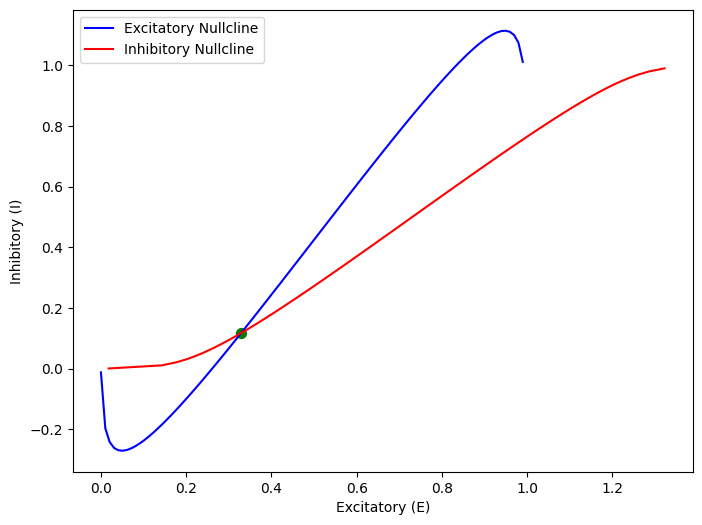

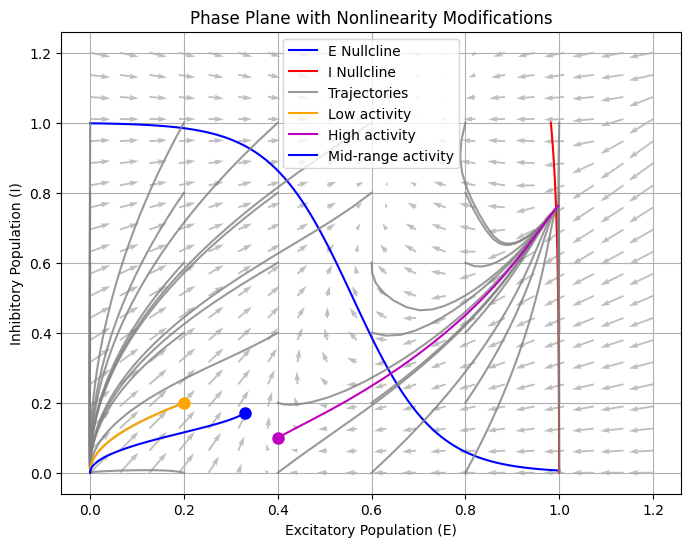

Intersection at (rE, rI): [0.32899908 0.1169332 ]


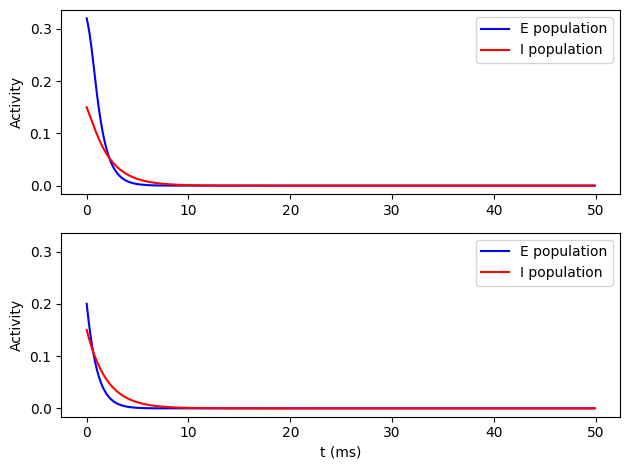

In [ ]:
# Function call example
test_higher_gain(2.3, 2.0, pars)

<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


Unstable Critical Point at [0.3297489  0.08985243] with Eigenvalues [ 5.60394031 -1.22811214]


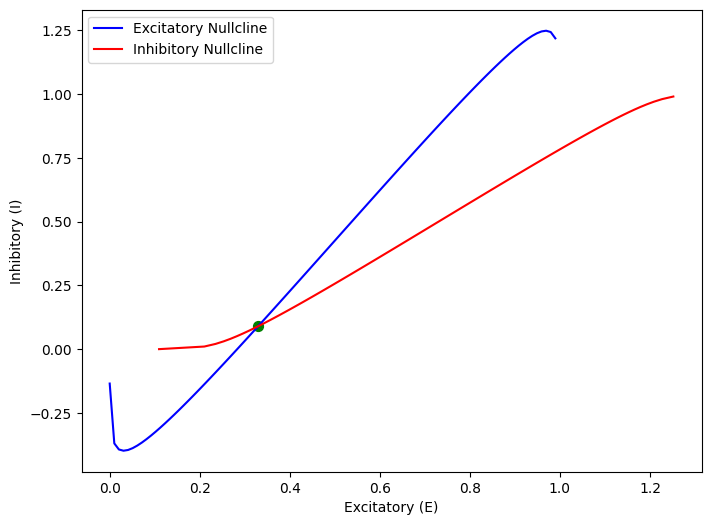

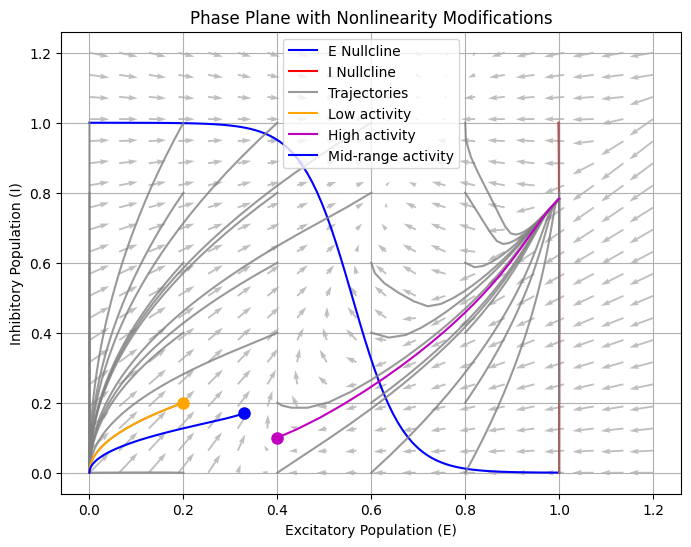

Intersection at (rE, rI): [0.3297489  0.08985243]


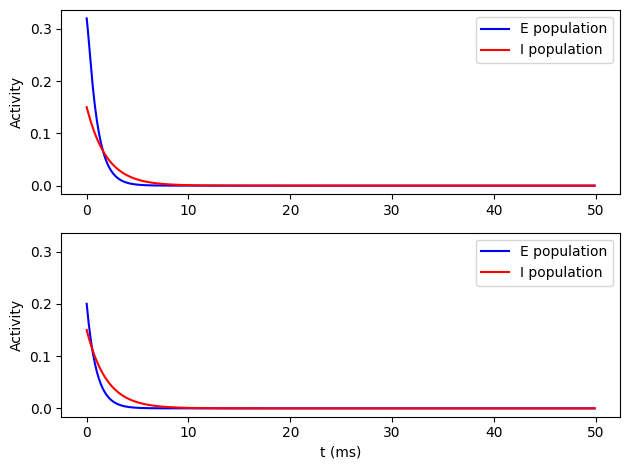

In [ ]:
test_higher_gain(3.7, 3.3, pars)

With the progressive increase in gain, the **phase diagrams** illustrate how the system becomes more sensitive to input, as evidenced by the steepening of the excitatory nullcline. In both cases, the nullclines intersect at a stable equilibrium, indicating that despite the increased responsiveness, the system retains a well-defined attractor state. The vector field and trajectory plots further confirm that excitatory and inhibitory populations rapidly converge to equilibrium, demonstrating a faster but still controlled response as gain increases.

The time series plots reinforce this finding by showing that while activity levels remain similar across both scenarios, the higher-gain case exhibits a quicker decay to equilibrium, suggesting a more responsive yet stable system. This balance between enhanced sensitivity and robust stability ensures that the network remains predictable and dynamically regulated, even under heightened gain conditions.

From a biological perspective, increased gain can push the system toward a hyper-excitable state, where even small perturbations generate amplified responses. This is a phenomenon commonly associated with neurological conditions such as epilepsy, where excessive excitatory activity disrupts normal neural processing. The phase diagrams effectively capture this transition, emphasizing how increasing gain modifies neural dynamics while maintaining an equilibrium state within certain limits.




> LOWER GAIN




In [ ]:
def test_lower_gain(new_a_E, new_a_I, parameters):
    # Create a copy of the parameters to protect the original data
    params_copy = dict(parameters)
    params_copy['a_E'], params_copy['a_I'] = new_a_E, new_a_I

    # Define ranges for nullclines
    excitatory_range = np.linspace(-0.01, 1, 100)
    inhibitory_range = np.linspace(-0.01, 1, 100)

    # Calculate nullclines using the updated parameters
    nullcline_excitatory = nullcline_E(excitatory_range, **{key: params_copy[key] for key in ['a_E', 'theta_E', 'wEE', 'wEI', 'I_ext_E']})
    nullcline_inhibitory = nullcline_I(inhibitory_range, **{key: params_copy[key] for key in ['a_I', 'theta_I', 'wIE', 'wII', 'I_ext_I']})

    # Find the intersection point using fsolve
    solve_args = (params_copy['a_E'], params_copy['theta_E'], params_copy['wEE'], params_copy['wEI'], params_copy['I_ext_E'],
                  params_copy['a_I'], params_copy['theta_I'], params_copy['wIE'], params_copy['wII'], params_copy['I_ext_I'])
    initial_guess = [0, 0]
    intersection_point = fsolve(nullcline_difference, initial_guess, args=solve_args)

    # Perform stability analysis
    eigenvalues = get_eigen_J(intersection_point, **params_copy)
    if np.all(np.real(eigenvalues) < 0):
        print(f"Stable Critical Point at {intersection_point} with Eigenvalues {eigenvalues}")
    else:
        print(f"Unstable Critical Point at {intersection_point} with Eigenvalues {eigenvalues}")

    # Simulate the system dynamics using the updated parameters
    simulation_args = {key: params_copy[key] for key in ['tau_E', 'a_E', 'theta_E', 'tau_I', 'a_I', 'theta_I', 'wEE', 'wEI', 'wIE', 'wII', 'I_ext_E', 'I_ext_I']}
    trajectory_rE1, trajectory_rI1 = simulate_wc(**simulation_args, rE_init=0.32, rI_init=0.15, dt=params_copy['dt'], range_t=params_copy['range_t'])
    trajectory_rE2, trajectory_rI2 = simulate_wc(**simulation_args, rE_init=0.2, rI_init=0.15, dt=params_copy['dt'], range_t=params_copy['range_t'])

    # Plot the nullclines and the intersection point
    plt.figure(figsize=(8, 6))
    plt.plot(excitatory_range, nullcline_excitatory, 'b', label='Excitatory Nullcline')
    plt.plot(nullcline_inhibitory, inhibitory_range, 'r', label='Inhibitory Nullcline')
    plt.xlabel('Excitatory (E)')
    plt.ylabel('Inhibitory (I)')
    plt.scatter(intersection_point[0], intersection_point[1], color='green', s=50, label='Intersection Point')
    plt.legend()
    plt.show()

    my_phase_plane(params_copy)


    # Display the intersection point
    print(f"Intersection at (rE, rI): {intersection_point}")

    # Plot the simulated trajectories
    my_test_plot(params_copy['range_t'], trajectory_rE1, trajectory_rI1, trajectory_rE2, trajectory_rI2)


<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


Stable Critical Point at [0. 0.] with Eigenvalues [-0.48219019+0.15447514j -0.48219019-0.15447514j]


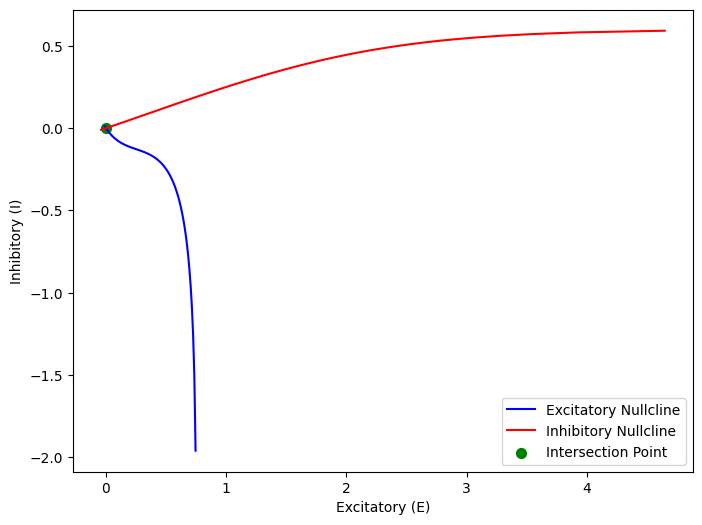

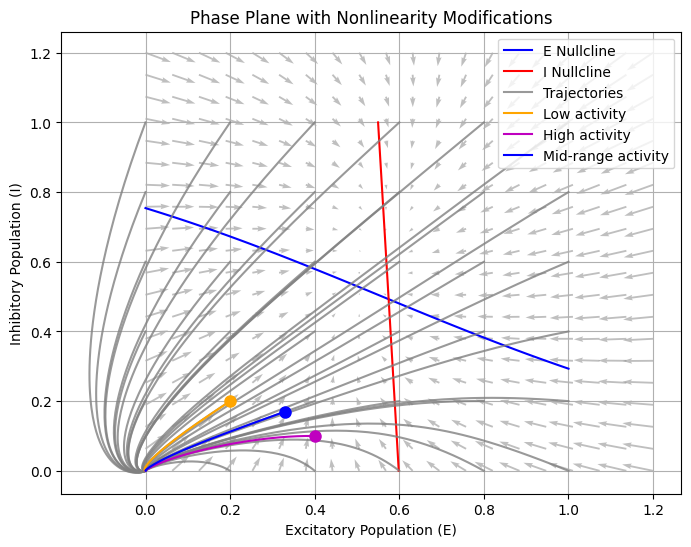

Intersection at (rE, rI): [0. 0.]


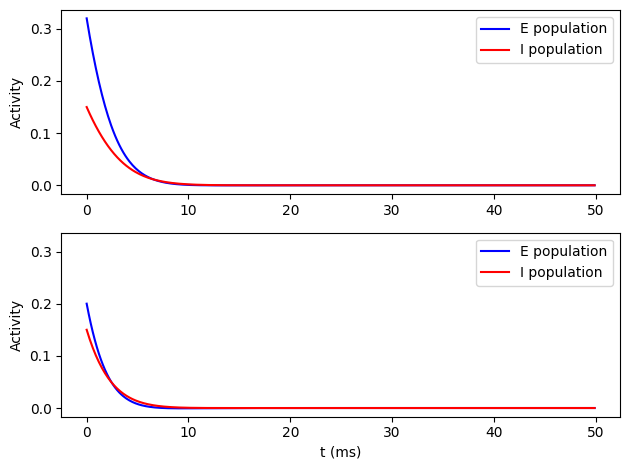

In [ ]:
test_lower_gain(0.4, 0.1, pars)

Stable Critical Point at [8.32617635e-17 2.02484495e-17] with Eigenvalues [-0.71641229+0.08205613j -0.71641229-0.08205613j]


<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta
<ipython-input-97-017a4573377b>:18: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  intersection_point = fsolve(nullcline_difference, initial_guess, args=solve_args)


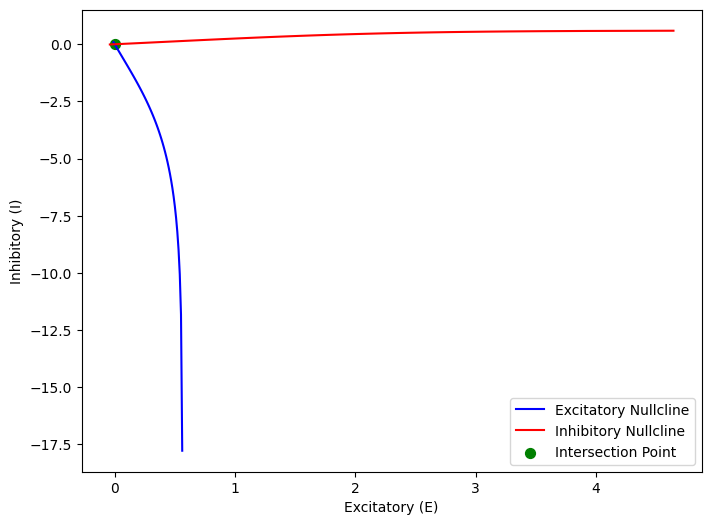

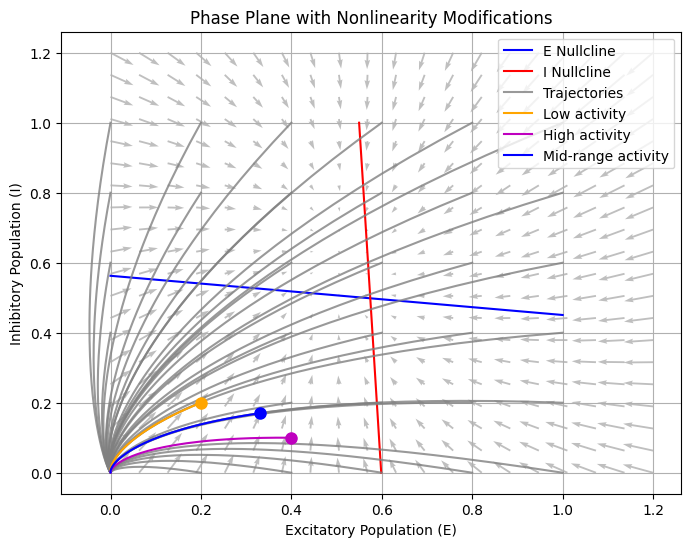

Intersection at (rE, rI): [8.32617635e-17 2.02484495e-17]


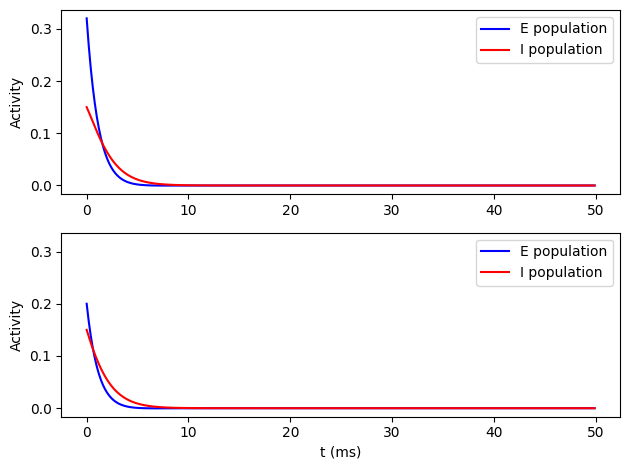

In [ ]:
test_lower_gain(0.09, 0.1, pars)

<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta
<ipython-input-97-017a4573377b>:18: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  intersection_point = fsolve(nullcline_difference, initial_guess, args=solve_args)


Stable Critical Point at [ 2.69177895e-17 -8.59728563e-18] with Eigenvalues [-0.97446227 -0.60018702]


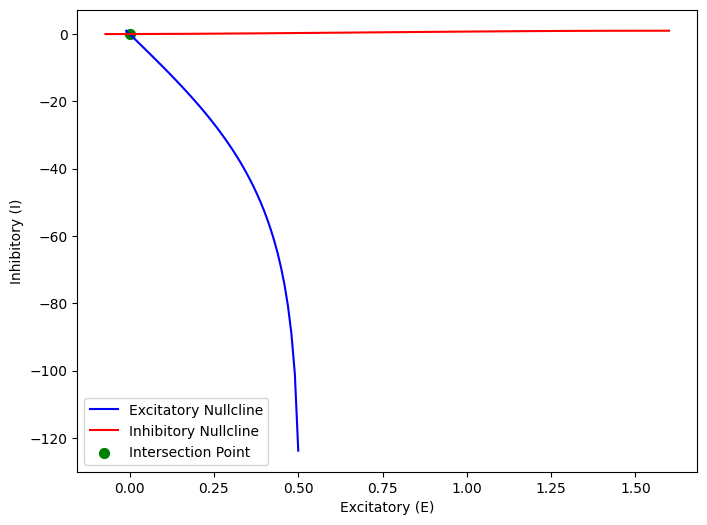

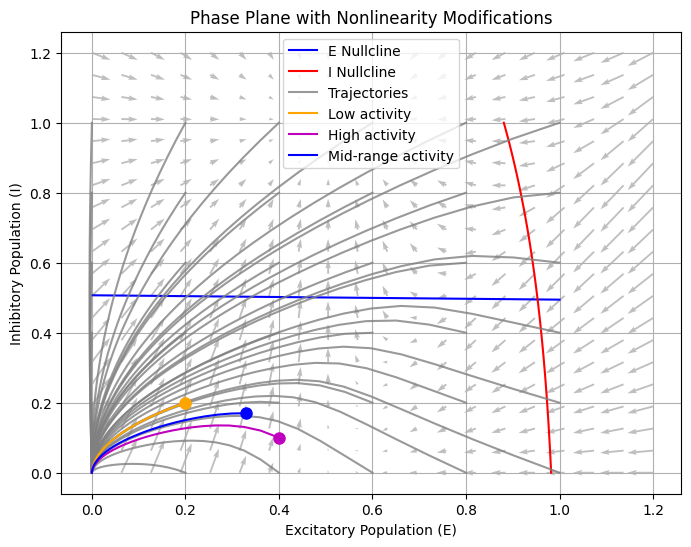

Intersection at (rE, rI): [ 2.69177895e-17 -8.59728563e-18]


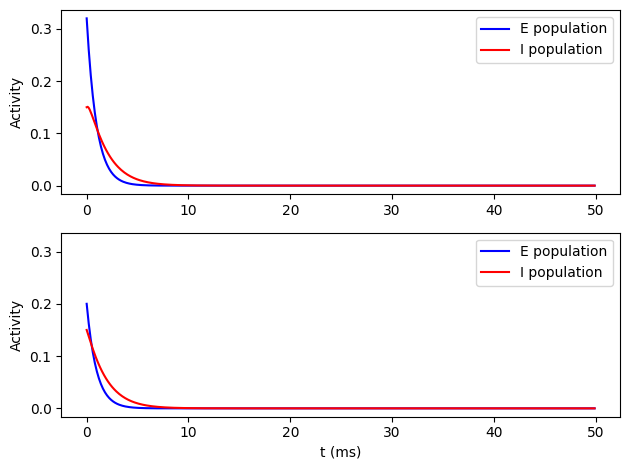

In [ ]:
test_lower_gain(0.01, 1.0, pars)

In all three cases, the progressive reduction of gain parameters results in a significant decrease in system responsiveness while maintaining high stability. The nullclines flatten as the gain decreases, reflecting a reduced sensitivity of the populations to input. The intersection point consistently remains near the origin, indicating low baseline activity for both excitatory and inhibitory populations.

The phase plane diagrams further support these insights, showing that as gain decreases, trajectories collapse more aggressively toward the origin, confirming that the system lacks the ability to generate meaningful neural activity. In the extreme low-gain case, the vector field reveals an immediate pull toward inactivity, with no sustained dynamics or attractor states, reinforcing the idea of complete neural suppression.

The temporal dynamics confirm this pattern, with both populations rapidly converging to near-zero activity, regardless of the initial conditions. This behavior demonstrates the system's robust stability, but it comes at the cost of reactivity and adaptability. These findings suggest that low gain settings effectively model neural states associated with minimal activity or resting conditions, such as during sleep, where stability is prioritized over responsiveness to external stimuli.

Biologically, low gain may represent gradual adaptation, as seen in learning or sensory processing. In general, understanding these parameters is critical for modeling neural disorders and optimizing artificial neural systems.

#### Case 2: Exploring Threshold Adjustments ($𝜃_E$ and $𝜃_I$)

The threshold parameters, $𝜃_E$ and $𝜃_I$, set the input level at which the excitatory and inhibitory populations reach half of their maximum firing rate. Adjusting these values affects the sensitivity of the populations to input, influencing the timing and magnitude of their responses.



#### Parameter Adjustments:
- **Default values**: $𝜃_E = 2.8$, $𝜃_I = 4.0$
- **Increase**: $𝜃_E$ raised to $4.0$ and then $9.0$; $𝜃_I$ increased to $6.0$ and then $11.0$
- **Decrease**: $𝜃_E$ lowered to $1.4$; $𝜃_I$ reduced to $2.0$



#### Expected Effects:
- **Increasing the Threshold**: Raising $𝜃_E$ and $𝜃_I$ increases the input required to activate the populations. This delays the onset of activity, as higher inputs are needed to overcome the threshold. In the phase portrait, this adjustment shifts the activity curves to the right, reflecting the increased input requirement. Behaviorally, this could reduce sensitivity to weak inputs, stabilizing the system and possibly suppressing oscillatory dynamics.

- **Decreasing the Threshold**: Lowering $𝜃_E$ and $𝜃_I$ reduces the input necessary for activation, making the populations more responsive to smaller inputs. In the phase portrait, this results in a leftward shift of the activity curves, indicating increased sensitivity. This adjustment may enhance system dynamics but could also increase susceptibility to fluctuations or instability.


> HIGHER THRESHOLD

In [ ]:
def higher_threshold_test(new_theta_E, new_theta_I, parameters):
    # Create a local copy of the parameters dictionary to avoid altering the original data
    local_parameters = parameters.copy()

    # Update the local parameters with the new threshold values
    local_parameters['theta_E'] = new_theta_E
    local_parameters['theta_I'] = new_theta_I

    # Generate nullclines using the updated local parameters
    exc_nullcline_rE = np.linspace(-0.01, 1, 100)
    exc_nullcline_rI = nullcline_E(exc_nullcline_rE, a_E=local_parameters['a_E'], theta_E=local_parameters['theta_E'], wEE=local_parameters['wEE'], wEI=local_parameters['wEI'], I_ext_E=local_parameters['I_ext_E'])

    inh_nullcline_rI = np.linspace(-0.01, 1, 100)
    inh_nullcline_rE = nullcline_I(inh_nullcline_rI, a_I=local_parameters['a_I'], theta_I=local_parameters['theta_I'], wIE=local_parameters['wIE'], wII=local_parameters['wII'], I_ext_I=local_parameters['I_ext_I'])

    # Simulate the system's trajectories using the updated local parameters
    rE_trajectory1, rI_trajectory1 = simulate_wc(local_parameters['tau_E'], local_parameters['a_E'], local_parameters['theta_E'],
                                                 local_parameters['tau_I'], local_parameters['a_I'], local_parameters['theta_I'],
                                                 local_parameters['wEE'], local_parameters['wEI'], local_parameters['wIE'], local_parameters['wII'],
                                                 local_parameters['I_ext_E'], local_parameters['I_ext_I'],
                                                 rE_init=0.32, rI_init=0.15, dt=local_parameters['dt'], range_t=local_parameters['range_t'])

    rE_trajectory2, rI_trajectory2 = simulate_wc(local_parameters['tau_E'], local_parameters['a_E'], local_parameters['theta_E'],
                                                 local_parameters['tau_I'], local_parameters['a_I'], local_parameters['theta_I'],
                                                 local_parameters['wEE'], local_parameters['wEI'], local_parameters['wIE'], local_parameters['wII'],
                                                 local_parameters['I_ext_E'], local_parameters['I_ext_I'],
                                                 rE_init=0.2, rI_init=0.15, dt=local_parameters['dt'], range_t=local_parameters['range_t'])

    # Plot the nullclines and trajectories
    plt.figure(figsize=(8, 6))
    plt.plot(exc_nullcline_rE, exc_nullcline_rI, 'b', label='Excitatory Nullcline')
    plt.plot(inh_nullcline_rE, inh_nullcline_rI, 'r', label='Inhibitory Nullcline')
    plt.xlabel('Excitatory (E)')
    plt.ylabel('Inhibitory (I)')
    plt.legend(loc='best')
    plt.show()

    my_phase_plane(local_parameters)


    # Plot the simulation results
    my_test_plot(local_parameters['range_t'], rE_trajectory1, rI_trajectory1, rE_trajectory2, rI_trajectory2)



<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


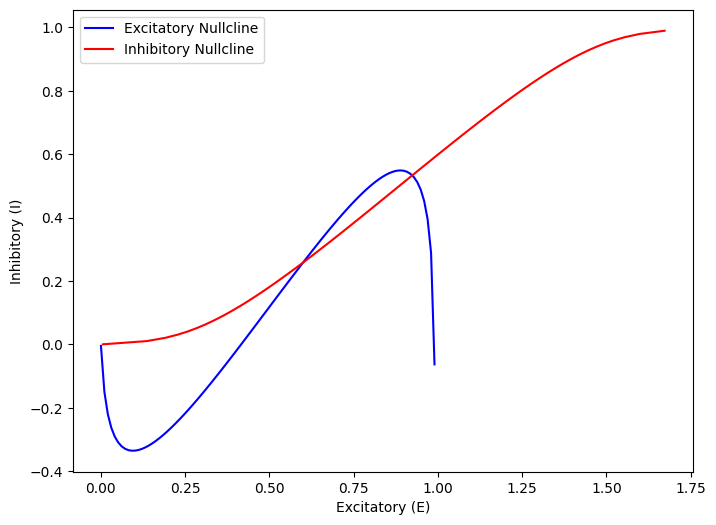

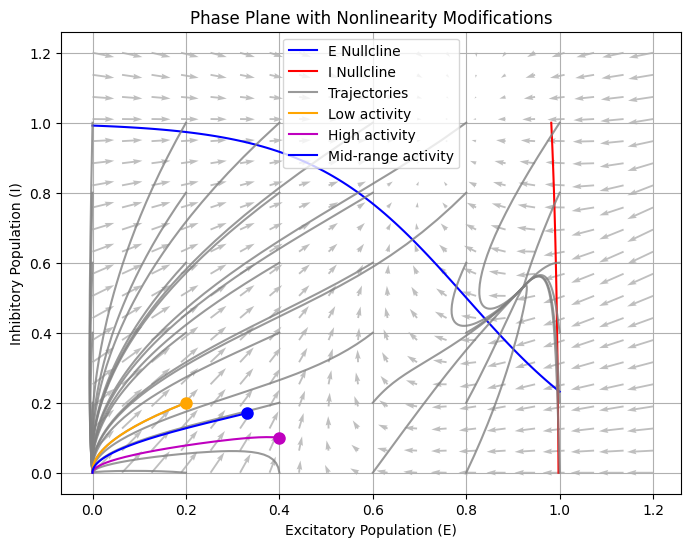

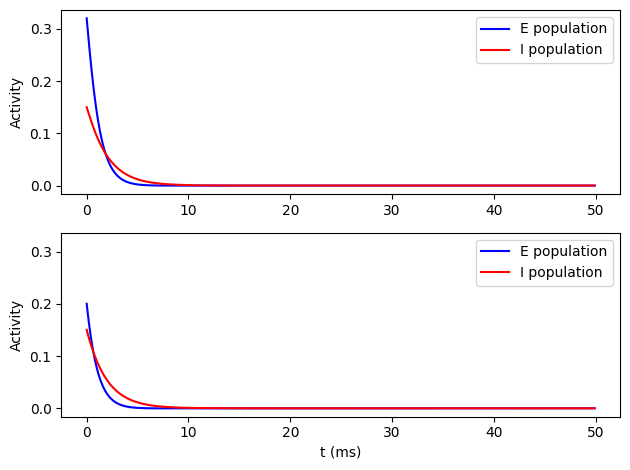

In [ ]:
higher_threshold_test(4.0, 6.0, pars)

<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


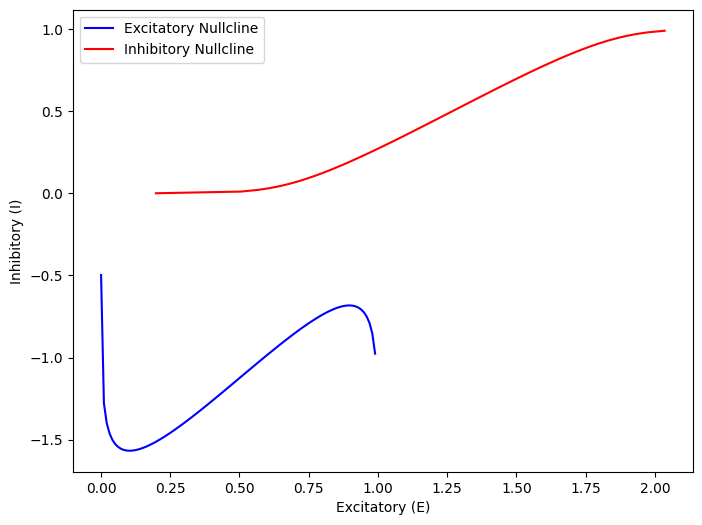

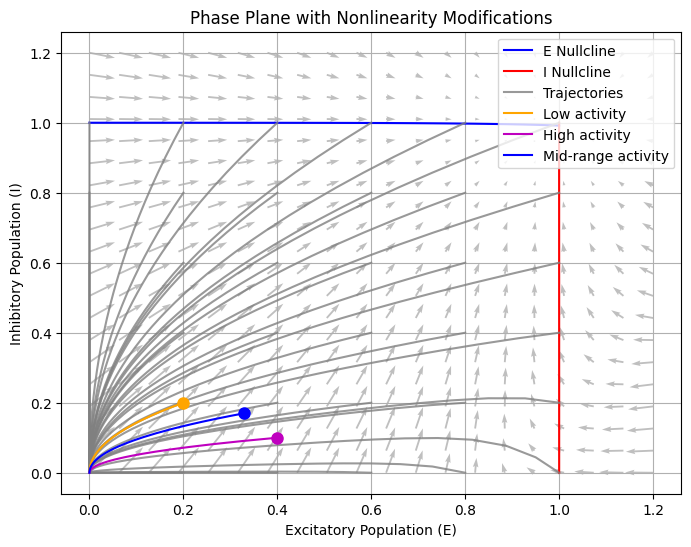

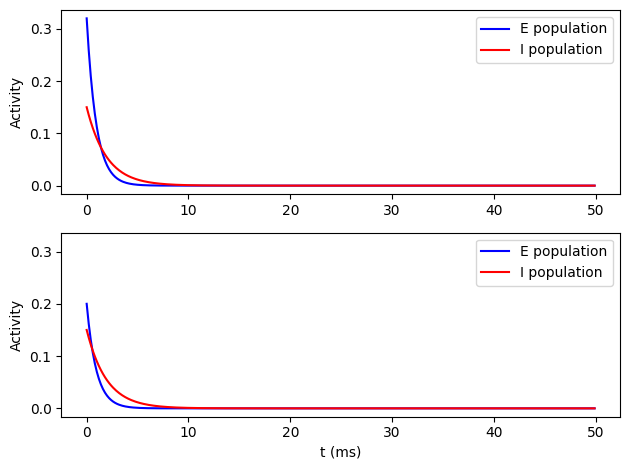

In [ ]:
higher_threshold_test(9.0, 11, pars)

Increasing the threshold parameters reduces the system's sensitivity to inputs, as indicated by the rightward shift of the nullclines. Higher thresholds delay the onset of activity by requiring greater input levels to activate the populations. This results in a system that rapidly stabilizes at low activity levels, becoming robust to weak input perturbations. The phase plane analysis confirms that trajectories increasingly converge toward low activity equilibria, reinforcing that small perturbations are insufficient to trigger sustained neural responses.

However, when thresholds are excessively high, the system becomes nearly unresponsive, with populations converging to inactivity and losing the ability to react to smaller inputs. Overall, increasing thresholds enhances stability by suppressing fluctuations, but extreme values sacrifice responsiveness, rendering the system unsuitable for dynamic scenarios.

In summary, higher thresholds reinforce stability by reducing spontaneous fluctuations, but excessive values compromise responsiveness, pushing the system toward a strict sensory gating mode or even complete inactivity. While moderate increases may help filter noise and prioritize strong signals, extreme cases create a highly selective, almost dormant system, making it unsuitable for dynamic neural processing scenarios where adaptability is required.




> LOWER THRESHOLD



In [ ]:
def lower_threshold_test(a, b, pars):
    # Copy of the pars dictionary to avoid modifying the original
    local_pars = pars.copy()

    # Update the copy with the new threshold values
    local_pars['theta_E'] = a
    local_pars['theta_I'] = b

    # Your existing code, but use local_pars instead of pars
    Exc_null_rE = np.linspace(-0.01, 1, 100)
    Exc_null_rI = nullcline_E(Exc_null_rE, a_E=local_pars['a_E'], theta_E=local_pars['theta_E'], wEE=local_pars['wEE'], wEI=local_pars['wEI'], I_ext_E=local_pars['I_ext_E'])
    Inh_null_rI = np.linspace(-0.01, 1, 100)
    Inh_null_rE = nullcline_I(Inh_null_rI, a_I=local_pars['a_I'], theta_I=local_pars['theta_I'], wIE=local_pars['wIE'], wII=local_pars['wII'], I_ext_I=local_pars['I_ext_I'])

    # Adjust the initial_guess and args as needed
    initial_guess = [0, 0]
    initial_guess2 = [0.8,0.6]
    args = (local_pars['a_E'], local_pars['theta_E'], local_pars['wEE'], local_pars['wEI'], local_pars['I_ext_E'],
            local_pars['a_I'], local_pars['theta_I'], local_pars['wIE'], local_pars['wII'], local_pars['I_ext_I'])

    # Find the intersection point using fsolve
    intersection_point = fsolve(nullcline_difference, initial_guess, args=args)
    intersection_point2 = fsolve(nullcline_difference, initial_guess2, args=args)

     # Perform stability analysis
    eigenvalues = get_eigen_J(intersection_point, **local_pars)
    if np.all(np.real(eigenvalues) < 0):
        print(f"Stable Critical Point at {intersection_point} with Eigenvalues {eigenvalues}")
    else:
        print(f"Unstable Critical Point at {intersection_point} with Eigenvalues {eigenvalues}")



    #Simulate trajectories using parameters from local_pars
    rE1, rI1 = simulate_wc(local_pars['tau_E'], local_pars['a_E'], local_pars['theta_E'], local_pars['tau_I'], local_pars['a_I'], local_pars['theta_I'],
                           local_pars['wEE'], local_pars['wEI'], local_pars['wIE'], local_pars['wII'], local_pars['I_ext_E'], local_pars['I_ext_I'],
                           rE_init=0.32, rI_init=0.15, dt=local_pars['dt'], range_t=local_pars['range_t'])

    rE2, rI2 = simulate_wc(local_pars['tau_E'], local_pars['a_E'], local_pars['theta_E'], local_pars['tau_I'], local_pars['a_I'], local_pars['theta_I'],
                           local_pars['wEE'], local_pars['wEI'], local_pars['wIE'], local_pars['wII'], local_pars['I_ext_E'], local_pars['I_ext_I'],
                           rE_init=0.2, rI_init=0.15, dt=local_pars['dt'], range_t=local_pars['range_t'])
    plt.figure(figsize=(8, 6))
    plt.plot(Exc_null_rE, Exc_null_rI, 'b', label='E nullcline')
    plt.plot(Inh_null_rE, Inh_null_rI, 'r', label='I nullcline')
    plt.xlabel('E')
    plt.ylabel('I')
    plt.legend(loc='best')
    plt.scatter(intersection_point[0], intersection_point[1], color='green', zorder=5, label='Intersection point')
    plt.scatter(intersection_point2[0], intersection_point2[1], color='green', zorder=5, label='Intersection point')
    print(f"Intersection point 1 (rE, rI): {intersection_point}")
    print(f"Intersection point 2 (rE, rI): {intersection_point2}")
    plt.show()

    my_phase_plane(local_pars)

    my_test_plot(local_pars['range_t'], rE1, rI1, rE2, rI2)


<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


Unstable Critical Point at [0. 0.] with Eigenvalues [ 0.04294514 -0.69031185]
Intersection point 1 (rE, rI): [0. 0.]
Intersection point 2 (rE, rI): [0.8249907  0.67204031]


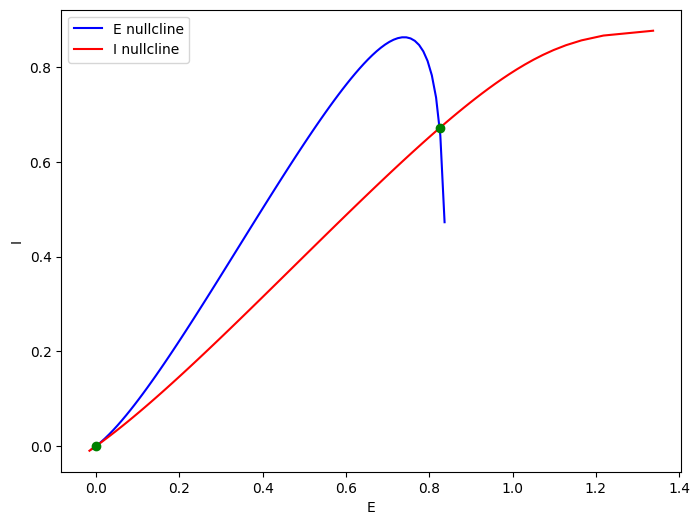

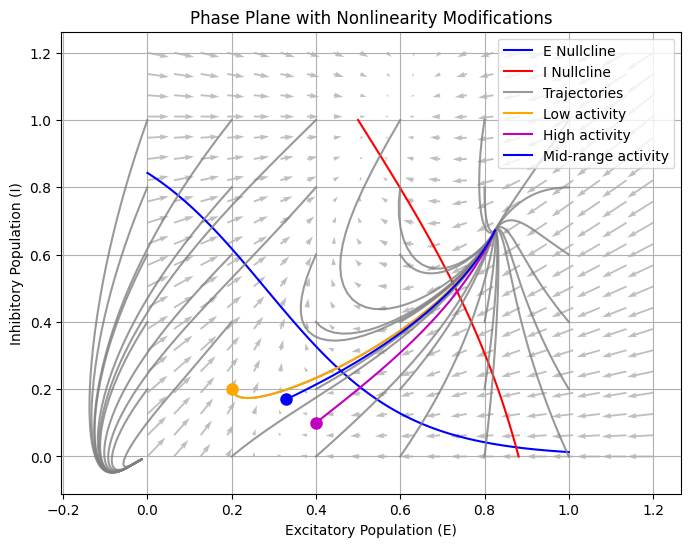

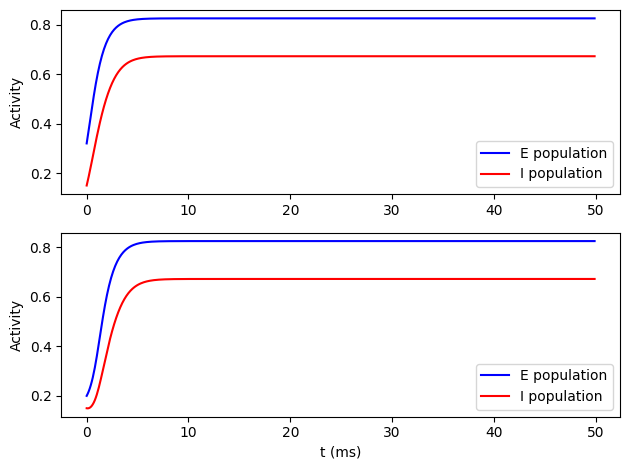

In [ ]:
lower_threshold_test(1.4, 2.0, pars)

Lowering the threshold parameters  significantly increases the sensitivity of the system to input. The excitatory and inhibitory nullclines shift leftward, indicating that smaller input levels are sufficient to activate the populations. The intersection point moves to a region of higher activity compared to higher thresholds, reflecting an enhanced baseline response.

The phase diagram further illustrates this increased sensitivity. The nullcline intersection occurs at an elevated activity level, meaning that the system naturally stabilizes in a more active state even with minimal input. The vector field shows trajectories converging to this higher equilibrium, confirming that excitatory-inhibitory interactions lead to persistent activity rather than decay to inactivity. Unlike high-threshold cases, where trajectories were drawn toward zero activity, here they indicate a self-sustaining neural state.

The temporal dynamics show a rapid convergence of both excitatory and inhibitory populations to relatively high activity levels. The trajectories demonstrate an increased responsiveness to initial conditions, with both populations stabilizing at elevated activity states compared to scenarios with higher thresholds.

Overall, this adjustment highlights the trade-off between sensitivity and stability. Lower thresholds result in a more reactive system, capable of responding to weaker inputs and sustaining higher activity. However, the increased sensitivity may also make the system more susceptible to noise and fluctuations, potentially compromising its robustness. The phase diagram supports this by illustrating stronger excitatory-inhibitory feedback, reinforcing how small inputs can maintain prolonged activation, making the system more dynamic but also more prone to runaway activity.

###**Task 4 - Change the connection strengths parameters**

**Objective:**

What happens to the critical points if you change the connection strengths
parameters $c_1$, $c_2$, $c_3$ and $c_4$ assigned in Task 1? We simulate and plot the activity
of the population with different choices of the parameters.

This task explores how modifications in the connection strength parameters  and  affect the critical points of the Wilson-Cowan model. These parameters represent the weights of excitatory and inhibitory interactions within the neural population and significantly influence system stability and activity patterns.

By varying these parameters and simulating neural activity, we observed how the system transitions between different dynamic regimes. Higher excitatory connections promote persistent firing, while stronger inhibition tends to dampen fluctuations and maintain homeostasis. These findings highlight the importance of balanced excitatory-inhibitory interactions in neural circuits.

The Wilson-Cowan model is governed by the following equations:

$$
\ \frac{dE(t)}{dt} = -E(t) + S_E \left( c_1 E(t) - c_2 I(t) + P_E \right)
$$

$$
\ \frac{dI(t)}{dt} = -I(t) + S_I \left( c_3 E(t) - c_4 I(t) + P_I \right)
$$

By modifying these connection strengths, we analyze:

* Changes in nullclines (where $\frac{dE(t)}{dt}=0 \text{ and } \frac{dI(t)}{dt}=0 $)
* Shifts in equilibrium points (fixed points).
* Stability of fixed points, using eigenvalues of the Jacobian matrix.



**Approach:**

We used the `modify_synaptic_weights` function that updates the synaptic connection strengths in a neural network model, computes nullclines, finds the intersection point (fixed point), analyzes its stability, and simulates the network's trajectories. Here is an overview of its structure and functionality:

- `E_to_E` (float): Synaptic weight from excitatory to excitatory neurons.
- `I_to_E` (float): Synaptic weight from inhibitory to excitatory neurons.
- `E_to_I` (float): Synaptic weight from excitatory to inhibitory neurons.
- `I_to_I` (float): Synaptic weight from inhibitory to inhibitory neurons.
- `parameters` (dict): Dictionary containing the network parameters.

1. **Parameter Modification**:
   - Creates a copy of the input **parameters** dictionary to avoid altering the original.
   - Synaptic weights ($wEE, wEI, wIE, wII$) in the copied dictionary are updated with the provided values.
   - This allows simulations with different connectivity strengths.

2. **Nullcline Computation**:
   - Excitatory nullcline: computed as values of $E$ where $\frac{dE(t)}{dt}=0$
   - Inhibitory nullcline: computed as values of $I$ where $\frac{dI(t)}{dt}=0$
   - The intersection of these nullclines represents the fixed points.

3. **Intersection Point (Fixed Point) Calculation**:
   - The function uses `fsolve` to numerically compute the intersection of the nullclines.
   - The `nullcline_difference` function ensures accurate calculations of where the excitatory and inhibitory responses balance.

4. **Stability Analysis**:
   - Defines an inner function, `compute_jacobian_eigenvalues`, to calculate the eigenvalues of the Jacobian matrix at the fixed point.
   - Evaluates the stability of the fixed point based on the real parts of the eigenvalues:
     - If all real parts are negative, the fixed point is stable (attractive).
     - If any real part is positive, the fixed point is unstable (repulsive).

5. **Trajectory Simulation**:
   - Simulates the trajectories of neuron responses using the `simulate_wc` function with the updated parameters.
   - Two sets of initial conditions are used to generate two trajectories.

6. **Plotting**:
   - Excitatory and inhibitory nullclines are plotted.
   - Fixed points are marked (intersections).
   - Displays the plot to visualize the nullclines and intersection point.
   - Calls the `my_test_plot` function to plot the simulated trajectories.





In [ ]:
def modify_synaptic_weights(E_to_E, I_to_E, E_to_I, I_to_I, parameters):
    # Copy the parameters dictionary to avoid modifying the original
    modified_params = parameters.copy()

    # Update synaptic weights in the copied parameters
    modified_params['wEE'] = E_to_E
    modified_params['wEI'] = I_to_E
    modified_params['wIE'] = E_to_I
    modified_params['wII'] = I_to_I

    # Compute nullclines with the updated parameters
    excitatory_nullcline_rE = np.linspace(-0.01, 1, 100)
    excitatory_nullcline_rI = nullcline_E(excitatory_nullcline_rE,
                                          a_E=modified_params['a_E'],
                                          theta_E=modified_params['theta_E'],
                                          wEE=modified_params['wEE'],
                                          wEI=modified_params['wEI'],
                                          I_ext_E=modified_params['I_ext_E'])

    inhibitory_nullcline_rI = np.linspace(-0.01, 1, 100)
    inhibitory_nullcline_rE = nullcline_I(inhibitory_nullcline_rI,
                                          a_I=modified_params['a_I'],
                                          theta_I=modified_params['theta_I'],
                                          wIE=modified_params['wIE'],
                                          wII=modified_params['wII'],
                                          I_ext_I=modified_params['I_ext_I'])

    # Initial guess for fsolve
    initial_conditions = [0, 0]
    fsolve_args = (modified_params['a_E'], modified_params['theta_E'], modified_params['wEE'], modified_params['wEI'], modified_params['I_ext_E'],
                   modified_params['a_I'], modified_params['theta_I'], modified_params['wIE'], modified_params['wII'], modified_params['I_ext_I'])

    # Find the intersection point using fsolve
    fixed_point = fsolve(nullcline_difference, initial_conditions, args=fsolve_args)

    def compute_jacobian_eigenvalues(fixed_point, tau_E, a_E, theta_E, wEE, wEI, I_ext_E, tau_I, a_I, theta_I, wIE, wII, I_ext_I, **additional_params):
        """Calculate the eigenvalues of the Jacobian matrix at the fixed point."""
        rE, rI = fixed_point
        J_matrix = np.zeros((2, 2))

        J_matrix[0, 0] = (-1 + wEE * dF(wEE * rE - wEI * rI + I_ext_E, a_E, theta_E)) / tau_E
        J_matrix[0, 1] = (-wEI * dF(wEE * rE - wEI * rI + I_ext_E, a_E, theta_E)) / tau_E
        J_matrix[1, 0] = (wIE * dF(wIE * rE - wII * rI + I_ext_I, a_I, theta_I)) / tau_I
        J_matrix[1, 1] = (-1 - wII * dF(wIE * rE - wII * rI + I_ext_I, a_I, theta_I)) / tau_I

        eigenvalues = np.linalg.eig(J_matrix)[0]
        return eigenvalues

    eigenvalues_at_fixed_point = compute_jacobian_eigenvalues(fixed_point, **parameters)

    points_list = [fixed_point]
    eigenvalues_list = [eigenvalues_at_fixed_point]

    for point, eigenvalues in zip(points_list, eigenvalues_list):
        if np.all(np.real(eigenvalues) < 0):
            print(f"Critical Point {point} = {eigenvalues}: Stable (Attractive)")
        elif np.any(np.real(eigenvalues) > 0):
            print(f"Critical Point {point} = {eigenvalues}: Unstable (Repulsive)")
        else:
            pass

    # Simulate trajectories using modified parameters
    rE_trajectory1, rI_trajectory1 = simulate_wc(modified_params['tau_E'], modified_params['a_E'], modified_params['theta_E'],
                                                 modified_params['tau_I'], modified_params['a_I'], modified_params['theta_I'],
                                                 modified_params['wEE'], modified_params['wEI'], modified_params['wIE'], modified_params['wII'],
                                                 modified_params['I_ext_E'], modified_params['I_ext_I'],
                                                 rE_init=0.32, rI_init=0.15, dt=modified_params['dt'], range_t=modified_params['range_t'])

    rE_trajectory2, rI_trajectory2 = simulate_wc(modified_params['tau_E'], modified_params['a_E'], modified_params['theta_E'],
                                                 modified_params['tau_I'], modified_params['a_I'], modified_params['theta_I'],
                                                 modified_params['wEE'], modified_params['wEI'], modified_params['wIE'], modified_params['wII'],
                                                 modified_params['I_ext_E'], modified_params['I_ext_I'],
                                                 rE_init=0.2, rI_init=0.15, dt=modified_params['dt'], range_t=modified_params['range_t'])

    # Plot the nullclines
    plt.figure(figsize=(8, 6))
    plt.plot(excitatory_nullcline_rE, excitatory_nullcline_rI, 'b', label='Excitatory Nullcline')
    plt.plot(inhibitory_nullcline_rE, inhibitory_nullcline_rI, 'r', label='Inhibitory Nullcline')
    plt.scatter(fixed_point[0], fixed_point[1], color='green', zorder=5, label='Intersection Point')
    plt.xlabel('Excitatory Neuron Response')
    plt.ylabel('Inhibitory Neuron Response')
    plt.legend(loc='best')
    plt.show()

    print(f"Intersection point (rE, rI): {fixed_point}")
    my_test_plot(modified_params['range_t'], rE_trajectory1, rI_trajectory1, rE_trajectory2, rI_trajectory2)



<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


Critical Point [0. 0.] = [-0.62338386+0.13110957j -0.62338386-0.13110957j]: Stable (Attractive)


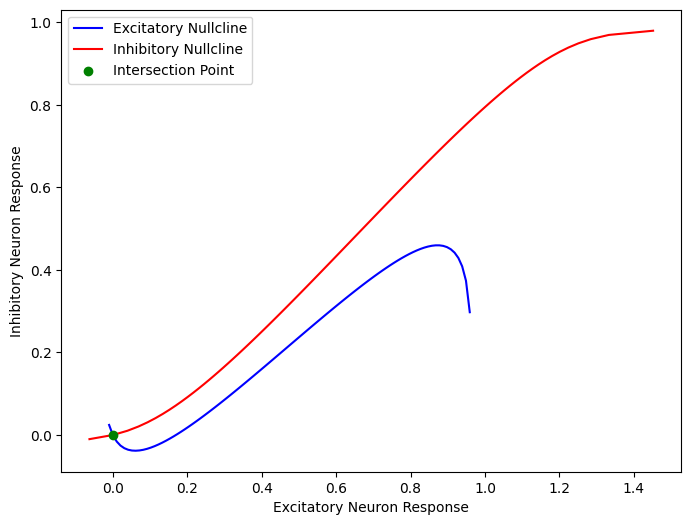

Intersection point (rE, rI): [0. 0.]


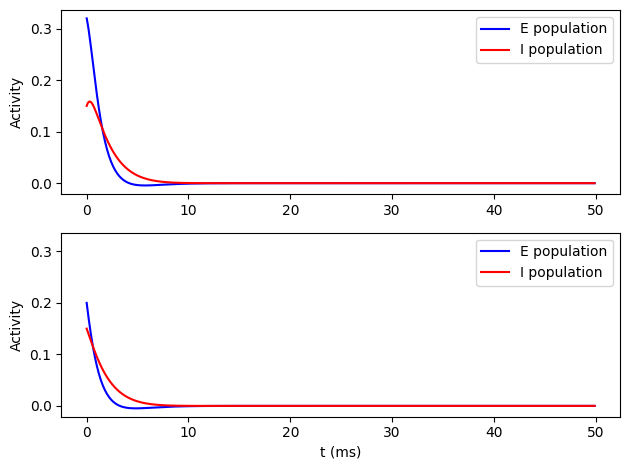

In [ ]:
# Example usage with new connection strengths
modify_synaptic_weights(9.8, 8.4, 15.0, 12.0, pars)


<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


Critical Point [0. 0.] = [-0.62338386+0.13110957j -0.62338386-0.13110957j]: Stable (Attractive)


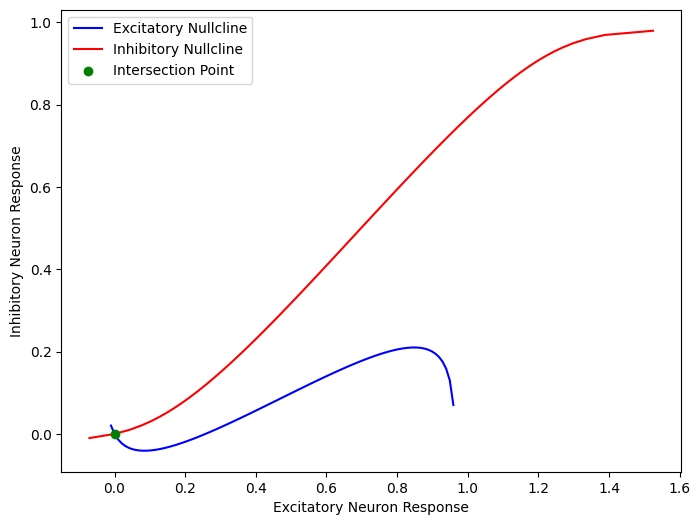

Intersection point (rE, rI): [0. 0.]


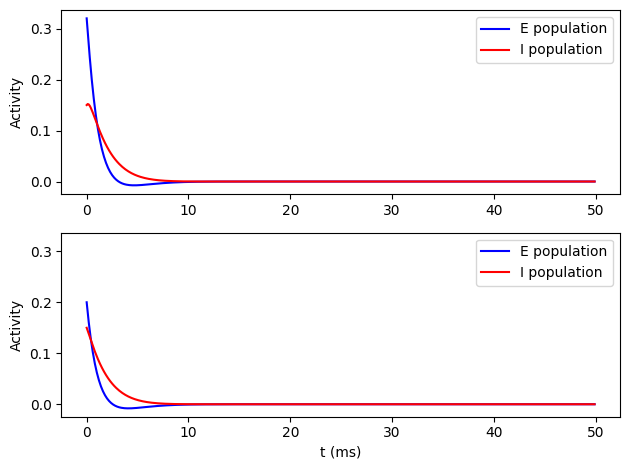

In [ ]:
modify_synaptic_weights(8.0, 11.0, 13.0, 10.0, pars)


<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


Critical Point [0. 0.] = [-0.62338386+0.13110957j -0.62338386-0.13110957j]: Stable (Attractive)


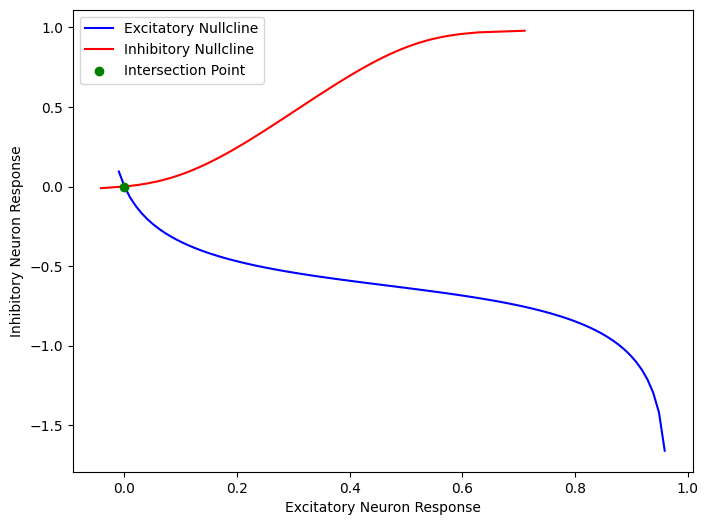

Intersection point (rE, rI): [0. 0.]


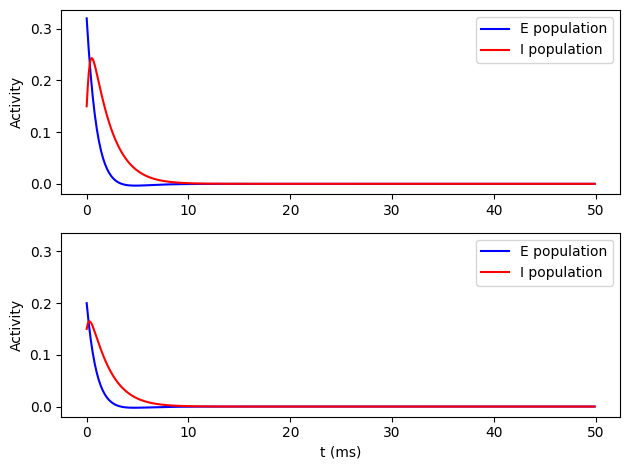

In [ ]:
modify_synaptic_weights(2.0, 3.0, 21.0, 5.0, pars)

**Analysis of the observed changes with synaptic weight variations:**

1. Effect of increased inhibitory synaptic strengths ($c_2$ or $c_4$, plots 1 and 2):

Increased inhibitory weights generally suppresses the overall excitatory activity. Consequently, we can observe nullcline shifts and notice how quickly the trajectories decay to zero.
The system becomes dominated by inhibition, potentially leading to a fixed point with low neural activity or even pathological suppression.

2. Effect of increased excitatory synaptic strengths ($c_1$ or $c_3$, plots 1 and 3):

Strengthening excitatory connections enhances the excitatory population's influence on itself and the inhibitory population. This change often raises the fixed point, with higher steady-state activity levels in both populations.
Excessive excitatory influence may destabilize the fixed point, introducing oscillatory or divergent dynamics if the system crosses critical bifurcation points.

3. Combined Modifications:

The interplay between excitatory and inhibitory synaptic weights determines the balance of excitation and inhibition in the system. Balanced weights result in stable, biologically realistic dynamics, while imbalances can lead to extreme suppression or runaway excitation.

###**Task 5 - Add an external stimulus**

**Objective:**

What happens to the critical points if you add an external stimulus? We simulate
and plot the activity of the population with different choices of $P_E$ and $P_I$ and then investigates the effect of a temporary perturbation in the inhibitory external input.


**Approach:**

The goal of this task is to explore how an external stimulus affects the dynamics of the neuron population. Specifically, how the critical points (equilibrium states) change when adding external inputs to the excitatory ($E$) and inhibitory ($I$) populations.


We approach this task by simulating three distinct scenarios to understand the effects of different external drives:



####**Test 1: Mild External Drive**
 This test involves applying a mild level of external stimulus to both excitatory and inhibitory populations ($P_E$ and $P_I$ are small positive values). The stimuli are balanced, meaning they affect both populations similarly and do not drastically alter the system’s dynamics. The goal is to observe whether the system remains stable and how much the critical points shift under mild perturbations.
- **Expected Outcome**: The critical points may shift slightly, but the system is expected to remain stable with small changes in neuron activity.
- **Actual Outcome:** The system behaved as expected, demonstrating robust homeostasis (ability to maintain stable function despite small changes).
This reflects the behavior of real neural circuits, where mild external input leads to adaptation without major functional changes.

Punto Critico [0.94854899 0.7246667 ] = [-0.92263713 -1.57314489]: Stabile (Attraente)
Punto di intersezione (rE, rI): [0.94854899 0.7246667 ]


<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


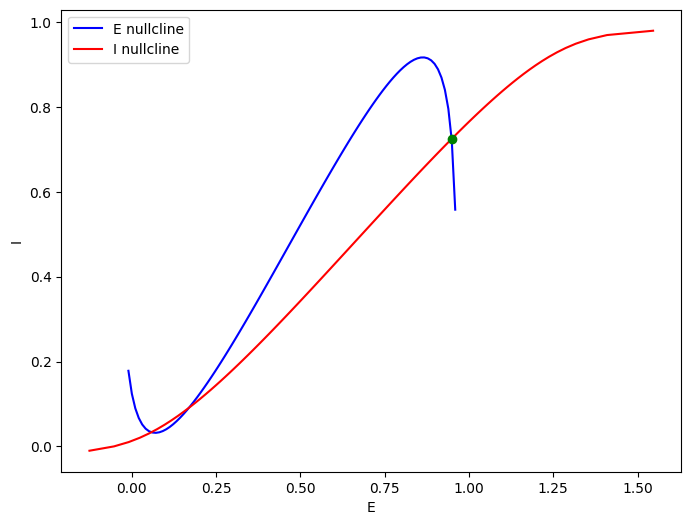

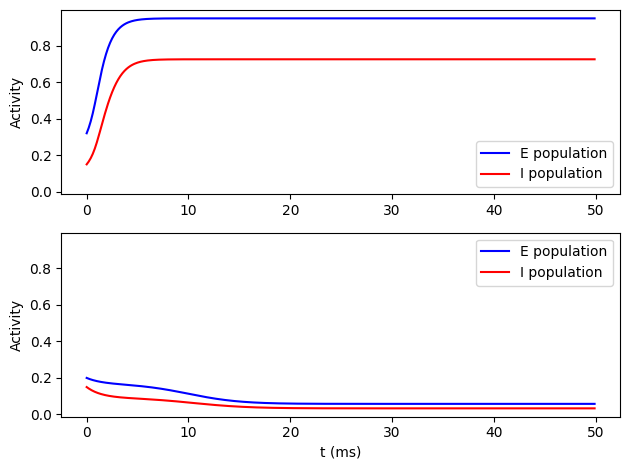

In [ ]:
def added_external_stimulus(a, b, pars):

    local_pars = pars.copy()

    # Assign new gain values to the copied parameters
    local_pars.update({'I_ext_E': a, 'I_ext_I': b})

    # Generate nullclines using updated local parameters
    Exc_null_rE = np.linspace(-0.01, 1, 100)
    Exc_null_rI = nullcline_E(Exc_null_rE, a_E=local_pars['a_E'], theta_E=local_pars['theta_E'], wEE=local_pars['wEE'], wEI=local_pars['wEI'], I_ext_E=local_pars['I_ext_E'])
    Inh_null_rI = np.linspace(-0.01, 1, 100)
    Inh_null_rE = nullcline_I(Inh_null_rI, a_I=local_pars['a_I'], theta_I=local_pars['theta_I'], wIE=local_pars['wIE'], wII=local_pars['wII'], I_ext_I=local_pars['I_ext_I'])

    guess_iniziale = [0.957, 0.65]
    argomenti = (local_pars['a_E'], local_pars['theta_E'], local_pars['wEE'], local_pars['wEI'], local_pars['I_ext_E'],
                 local_pars['a_I'], local_pars['theta_I'], local_pars['wIE'], local_pars['wII'], local_pars['I_ext_I'])

    # Find the intersection point using fsolve
    punto_intersezione = fsolve(nullcline_difference, guess_iniziale, args=argomenti)

    def get_eig_Jacobian(fp, tau_E, a_E, theta_E, wEE, wEI, I_ext_E, tau_I, a_I, theta_I, wIE, wII, I_ext_I, **other_pars):
        """Calcolare i valori propri della matrice Jacobiana di Wilson-Cowan al punto fisso."""
        # Initialization
        rE, rI = fp
        J = np.zeros((2, 2))
        # Calculating the four elements of the Jacobian matrix
        J[0, 0] = (-1 + wEE * dF(wEE * rE - wEI * rI + I_ext_E, a_E, theta_E)) / tau_E
        J[0, 1] = (-wEI * dF(wEE * rE - wEI * rI + I_ext_E, a_E, theta_E)) / tau_E
        J[1, 0] = (wIE * dF(wIE * rE - wII * rI + I_ext_I, a_I, theta_I)) / tau_I
        J[1, 1] = (-1 - wII * dF(wIE * rE - wII * rI + I_ext_I, a_I, theta_I)) / tau_I

        # Calculate and return the eigenvalues
        evals = np.linalg.eig(J)[0]
        return evals

    eig_1 = get_eig_Jacobian(punto_intersezione, **pars)
    lista_intersezioni = [punto_intersezione]
    lista_eigenvalues = [eig_1]

    for inter, eig in zip(lista_intersezioni, lista_eigenvalues):
        if np.all(np.real(eig) < 0):
            print(f"Punto Critico {inter} = {eig}: Stabile (Attraente)")
        elif np.any(np.real(eig) > 0):
            print(f"Punto Critico {inter} = {eig}: Instabile (Repulsivo)")
        else:
            pass

    # Simulate the trajectories using the parameters from local_pars
    rE1, rI1 = simulate_wc(local_pars['tau_E'], local_pars['a_E'], local_pars['theta_E'], local_pars['tau_I'], local_pars['a_I'], local_pars['theta_I'],
                           local_pars['wEE'], local_pars['wEI'], local_pars['wIE'], local_pars['wII'], local_pars['I_ext_E'], local_pars['I_ext_I'],
                           rE_init=0.32, rI_init=0.15, dt=local_pars['dt'], range_t=local_pars['range_t'])

    rE2, rI2 = simulate_wc(local_pars['tau_E'], local_pars['a_E'], local_pars['theta_E'], local_pars['tau_I'], local_pars['a_I'], local_pars['theta_I'],
                           local_pars['wEE'], local_pars['wEI'], local_pars['wIE'], local_pars['wII'], local_pars['I_ext_E'], local_pars['I_ext_I'],
                           rE_init=0.2, rI_init=0.15, dt=local_pars['dt'], range_t=local_pars['range_t'])

    plt.figure(figsize=(8, 6))
    plt.plot(Exc_null_rE, Exc_null_rI, 'b', label='E nullcline')
    plt.plot(Inh_null_rE, Inh_null_rI, 'r', label='I nullcline')
    plt.xlabel('E')
    plt.ylabel('I')
    plt.legend(loc='best')
    plt.scatter(punto_intersezione[0], punto_intersezione[1], color='green', zorder=5, label='Punto di Intersezione')
    print(f"Punto di intersezione (rE, rI): {punto_intersezione}")
    plt.show()
    my_test_plot(local_pars['range_t'], rE1, rI1, rE2, rI2)

added_external_stimulus(0.5, 0.7, pars)



####**Test 2: Strong External Drive**
Here, a strong stimulus is applied ($P_E$ and $P_I$ are large). This tests whether the system exhibits new behaviors, such as oscillations, saturation, or instability when subjected to a significant external force.
- **Expected Outcome**: The increased external input is likely to lead to a more dramatic shift in the critical points, potentially inducing new patterns of activity such as sustained oscillations or heightened reactivity (neurons firing at near-maximum levels).
- **Actual Outcome:** The system did not oscillate or become unstable, meaning it could handle strong external inputs without breaking down. Critical points shifted significantly, with the system adapting to the new high-activity states. This suggests the model is highly stable, possibly due to strong inhibitory feedback mechanisms preventing runaway excitation, which could be indicative of adaptive neural mechanisms in real systems.


<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


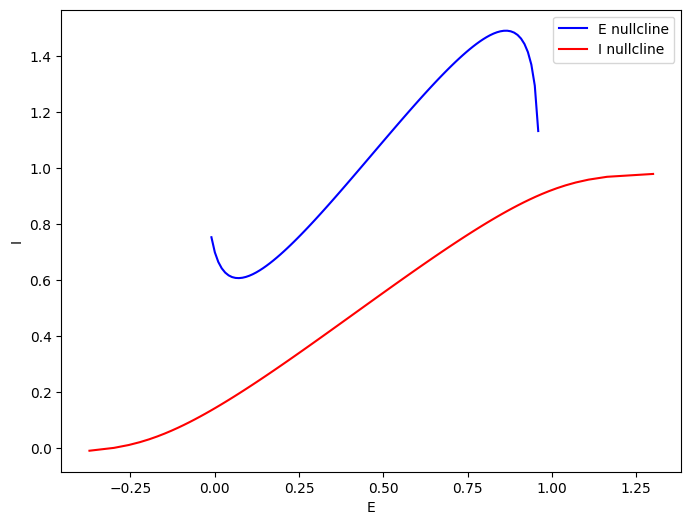

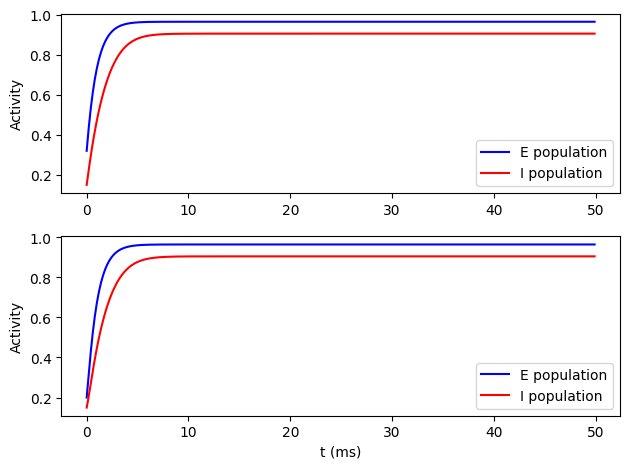

In [ ]:
def added_external_stimulus(a, b, pars):
    # Create a copy of the pars dictionary to preserve the original data
    local_parameters = pars.copy()

    # Modify the copy with new gain values
    # Assign new gain values to the copied parameters
    local_parameters.update({'I_ext_E': a, 'I_ext_I': b})

    # Generate nullclines using the updated local parameters
    Exc_null_rE = np.linspace(-0.01, 1, 100)
    Exc_null_rI = nullcline_E(Exc_null_rE, a_E=local_parameters['a_E'], theta_E=local_parameters['theta_E'], wEE=local_parameters['wEE'], wEI=local_parameters['wEI'], I_ext_E=local_parameters['I_ext_E'])
    Inh_null_rI = np.linspace(-0.01, 1, 100)
    Inh_null_rE = nullcline_I(Inh_null_rI, a_I=local_parameters['a_I'], theta_I=local_parameters['theta_I'], wIE=local_parameters['wIE'], wII=local_parameters['wII'], I_ext_I=local_parameters['I_ext_I'])

    # Simulate trajectories using updated local parameters
    rE1, rI1 = simulate_wc(local_parameters['tau_E'], local_parameters['a_E'], local_parameters['theta_E'], local_parameters['tau_I'], local_parameters['a_I'], local_parameters['theta_I'],
                           local_parameters['wEE'], local_parameters['wEI'], local_parameters['wIE'], local_parameters['wII'], local_parameters['I_ext_E'], local_parameters['I_ext_I'],
                           rE_init=0.32, rI_init=0.15, dt=local_parameters['dt'], range_t=local_parameters['range_t'])

    rE2, rI2 = simulate_wc(local_parameters['tau_E'], local_parameters['a_E'], local_parameters['theta_E'], local_parameters['tau_I'], local_parameters['a_I'], local_parameters['theta_I'],
                           local_parameters['wEE'], local_parameters['wEI'], local_parameters['wIE'], local_parameters['wII'], local_parameters['I_ext_E'], local_parameters['I_ext_I'],
                           rE_init=0.2, rI_init=0.15, dt=local_parameters['dt'], range_t=local_parameters['range_t'])

    plt.figure(figsize=(8, 6))
    plt.plot(Exc_null_rE, Exc_null_rI, 'b', label='E nullcline')
    plt.plot(Inh_null_rE, Inh_null_rI, 'r', label='I nullcline')
    plt.xlabel('E')
    plt.ylabel('I')
    plt.legend(loc='best')
    plt.show()
    my_test_plot(local_parameters['range_t'], rE1, rI1, rE2, rI2)

added_external_stimulus(2.8, 3.9, pars)


####**Test 3: Unbalanced External Drive**
 An unbalanced stimulus means different strengths or types of stimuli are applied to the excitatory and inhibitory populations. For instance, a strong stimulus might be applied to the excitatory neurons and a weaker one to the inhibitory neurons, or vice versa ($P_E >> P_I$). This tests the system's ability to maintain balance between excitation and inhibition under asymmetric conditions.
- **Expected Outcome**: The asymmetry in external driving forces is expected to disrupt the balance between excitatory and inhibitory activities, leading to complex dynamical behaviors. This could manifest as asymmetrical activity patterns, destabilization of existing critical points, or the emergence of new critical behaviors. Depending on the direction of imbalance, either excitation dominates or inhibition suppresses activity.
- **Actual Outcome:** The unbalanced external drive resulted in an asymmetrical shift of the system's dynamics. Excitatory activity dominated inhibitory activity due to the stronger external stimulus ($P_E >> P_I$). However, the system adapted to the imbalance and achieved a stable equilibrium. This suggests the presence of adaptive mechanisms that allow neural circuits to maintain functional equilibrium even under asymmetric perturbations.



<ipython-input-82-e130f778c85e>:92: RuntimeWarning: invalid value encountered in log
  F_inverse = -1/a * np.log((x + (1 + np.exp(a * theta))**-1)**-1 - 1) + theta


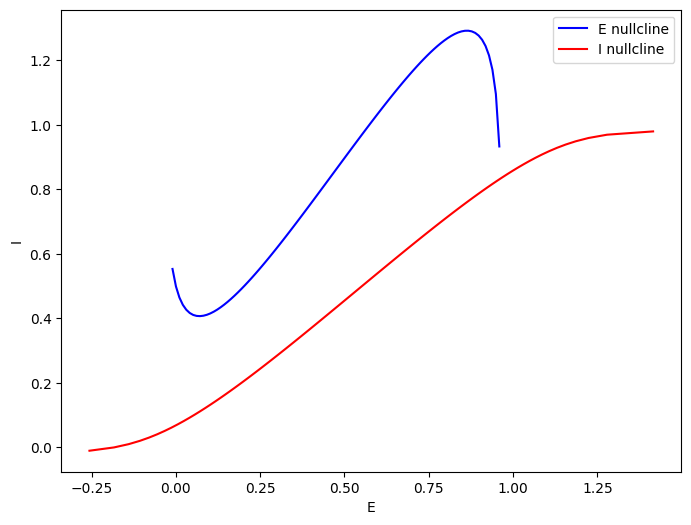

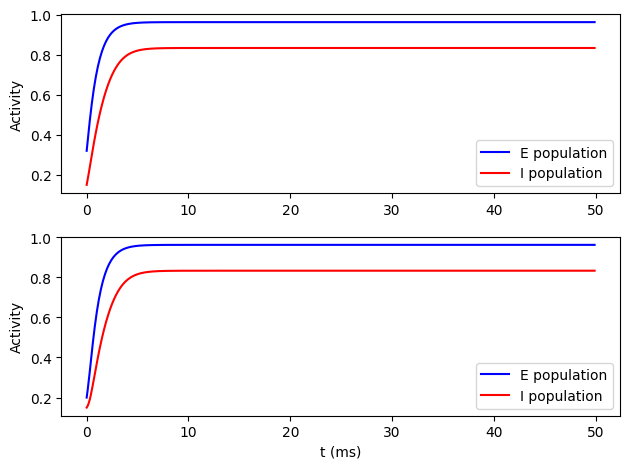

In [ ]:
def added_external_stimulus(a, b, pars, c):
    # Create a copy of the pars dictionary to avoid altering the original data
    local_parameters = pars.copy()

    # Assign new gain values to the copied parameters
    local_parameters.update({'I_ext_E': a, 'I_ext_I': b})

    # Generate nullclines using the updated local parameters
    Exc_null_rE = np.linspace(-0.01, 1, 100)
    Exc_null_rI = nullcline_E(Exc_null_rE, a_E=local_parameters['a_E'], theta_E=local_parameters['theta_E'], wEE=local_parameters['wEE'], wEI=local_parameters['wEI'], I_ext_E=local_parameters['I_ext_E'])
    Inh_null_rI = np.linspace(-0.01, 1, 100)
    Inh_null_rE = nullcline_I(Inh_null_rI, a_I=local_parameters['a_I'], theta_I=local_parameters['theta_I'], wIE=local_parameters['wIE'], wII=local_parameters['wII'], I_ext_I=local_parameters['I_ext_I'])

    initial_guess = [0.957, 0.65]
    args = (local_parameters['a_E'], local_parameters['theta_E'], local_parameters['wEE'], local_parameters['wEI'], local_parameters['I_ext_E'],
            local_parameters['a_I'], local_parameters['theta_I'], local_parameters['wIE'], local_parameters['wII'], local_parameters['I_ext_I'])

    # Find the intersection point using fsolve
    intersection_point = fsolve(nullcline_difference, initial_guess, args=args)

    # Simulate trajectories using updated local parameters
    rE1, rI1 = simulate_wc(local_parameters['tau_E'], local_parameters['a_E'], local_parameters['theta_E'], local_parameters['tau_I'], local_parameters['a_I'], local_parameters['theta_I'],
                           local_parameters['wEE'], local_parameters['wEI'], local_parameters['wIE'], local_parameters['wII'], local_parameters['I_ext_E'], local_parameters['I_ext_I'],
                           rE_init=0.32, rI_init=0.15, dt=local_parameters['dt'], range_t=local_parameters['range_t'])

    rE2, rI2 = simulate_wc(local_parameters['tau_E'], local_parameters['a_E'], local_parameters['theta_E'], local_parameters['tau_I'], local_parameters['a_I'], local_parameters['theta_I'],
                           local_parameters['wEE'], local_parameters['wEI'], local_parameters['wIE'], local_parameters['wII'], local_parameters['I_ext_E'], local_parameters['I_ext_I'],
                           rE_init=0.2, rI_init=0.15, dt=local_parameters['dt'], range_t=local_parameters['range_t'])

    plt.figure(figsize=(8, 6))
    plt.plot(Exc_null_rE, Exc_null_rI, 'b', label='E nullcline')
    plt.plot(Inh_null_rE, Inh_null_rI, 'r', label='I nullcline')
    plt.xlabel('E')
    plt.ylabel('I')
    plt.legend(loc='best')

    if c == 1:
        plt.scatter(intersection_point[0], intersection_point[1], color='green', zorder=5, label='Intersection point')
        print(f"Intersection point (rE, rI): {intersection_point}")
    else:
        pass

    plt.show()
    my_test_plot(local_parameters['range_t'], rE1, rI1, rE2, rI2)

added_external_stimulus(2.0, 2.4, pars, 0)


####**Test 4: Transient Inhibitory Perturbation**

This test investigates the effect of a temporary perturbation in the inhibitory external input.
Unlike the previous tests, where external input was applied continuously, here we introduce a short-term perturbation during the simulation to examine the system’s transient response.

- **Expected Outcome:** A transient inhibitory perturbation at $t=25 ms$ was expected to briefly suppress excitatory and inhibitory  activities, followed by stabilization at a new equilibrium. Larger perturbations could shift equilibrium points, but oscillations were not anticipated due to the stabilizing effect of inhibition.

- **Actual Outcome:** Both $r_E$ and $r_I$ decreased in response to inhibition but quickly stabilized at lower activity levels. No oscillations occurred, confirming that the network effectively absorbs inhibitory input. The dashed lines indicate a shift in steady-state activity, demonstrating the system’s adaptability.

These results highlight the stability and regulatory role of inhibition in neural dynamics, preventing runaway excitation and maintaining homeostasis.

In [ ]:
def ISN_I_perturb(dI=0.1):
    """
    Simulate the Wilson-Cowan model with a transient inhibitory perturbation.
    """
    pars = default_pars(T=50., dt=0.1)

    # Create inhibitory input starting at t = 25 ms
    lt = len(pars['range_t'])
    pars['I_ext_I'] = np.zeros(lt)
    pars['I_ext_I'][int(lt / 2):] = dI  # Addition of perturbation

    # Set initial conditions
    pars['rE_init'], pars['rI_init'] = 0.5, 0.3

    # *Remove 'T' from the dictionary before the simulation*
    pars.pop('T', None)

    # Simulate the system
    rE, rI = simulate_wc(**pars)

    # Plot inhibitory input
    plt.figure(figsize=(12, 1.5))
    plt.plot(pars['range_t'], pars['I_ext_I'], 'k')
    plt.xlabel('t (ms)')
    plt.ylabel(r'$I_{\text{ext}_I}$')
    plt.ylim(-0.01, max(0.12, np.max(pars['I_ext_I']) + 0.01))
    plt.show()

    # Plot neuronal activities
    plt.figure(figsize=(8, 4.5))
    plt.plot(pars['range_t'], rE, 'b', label=r'$r_E$')
    plt.plot(pars['range_t'], rI, 'r', label=r'$r_I$')
    plt.xlabel('t (ms)')
    plt.ylabel('Activity')
    plt.axhline(np.mean(rE), linestyle='dashed', color='b', alpha=0.5)
    plt.axhline(np.mean(rI), linestyle='dashed', color='r', alpha=0.5)
    plt.legend(loc='best')
    plt.show()

# Use intercative widget to test different levels of perturbation
widgets.interact(ISN_I_perturb, dI=(-0.1, 0.1, 0.02))


interactive(children=(FloatSlider(value=0.1, description='dI', max=0.1, min=-0.1, step=0.02), Output()), _dom_…

<function __main__.ISN_I_perturb(dI=0.1)>

Each test is designed to simulate these scenarios and plot the resulting activities of the neural populations. By analyzing these simulations, we gain insights into how external stimuli can manipulate neural dynamics, influence critical points, and potentially drive the system toward different states of equilibrium or inequilibrium. This exploration is critical for applications in computational neuroscience, where understanding the impact of external influences on neural circuits is key to both theoretical and practical advancements.

###**Task 6 - Oscillations**

**Objective:**

Some populations of neurons (for example the excitatory unipolar brush cells and the inhibitory Golgi cells in the cerebellar cortex) may show an oscillatory behavior, with the spiking rates of the two populations cyclically varying between a maximum and a minimum.

We set $c1 =6.4$, $c2 =4.8$, $c3 =6.0$ and $c4 =1.2$ in the main equation and suppose to apply an external stimulus PE to the excitatory subpopulation, leaving the inhibitory subpopulation with no external input ($PI = 0$).

We find which external stimuli $0.1 ≤ PE ≤ 1.2$ give rise to an oscillatory behavior. Consider the initial conditions $E(0) = 0.32$ and $I(0) = 0.15$.



**Approach:**

We will vary the external input $PE$ within the range $0.1 ≤ PE ≤ 1.2$ while the inhibitory population receives no external input ($PI = 0$). Then we will simulate the Wilson-Cowan Dynamics. The system is numerically integrated for a time span of 100 ms using the predefined initial conditions:
* $E(0)= 0.32$
* $E(I) = 0.15$

We analyze how the excitatory and inhibitory populations evolve over time.

Next, we identify the oscillations: for each $PE$, we plot time series of $E(t)$ and $I(t)$ to observe if they exhibit periodic behavior. We then determine whether the system converges to a stable state or sustains oscillations.

With phase portrait analysis, where the portraits are plotted using the quiver function to visualize trajectory directions, we check for limit cycles.
If a limit cycle appears, we classify it as:
* Attractive: Neighboring trajectories converge to the cycle.
* Repulsive: Neighboring trajectories diverge from the cycle.

To complement the time-series analysis, we utilize phase diagrams to gain deeper insights into system dynamics. The nullclines indicate equilibrium points, while the vector field shows the flow of trajectories. If a closed trajectory (limit cycle) appears, it confirms sustained oscillations. By analyzing trajectory convergence or divergence, we can classify the stability of the oscillations.

**Expected Outcomes:**
* For small $PE$, the system likely settles into a stable equilibrium.
* For intermediate $PE$, oscillatory behavior may emerge, forming a limit cycle.
* For large $PE$, excitatory activity may saturate, suppressing oscillations.



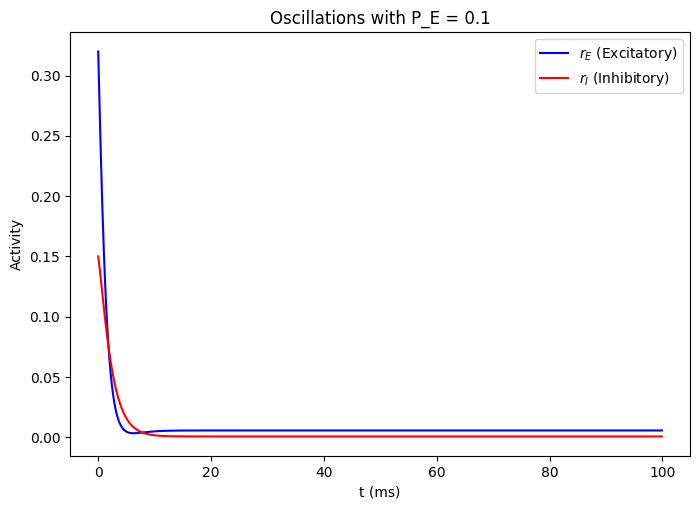

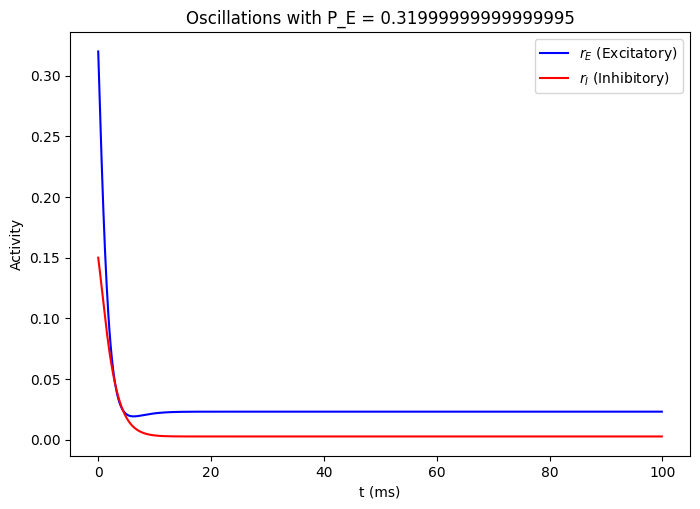

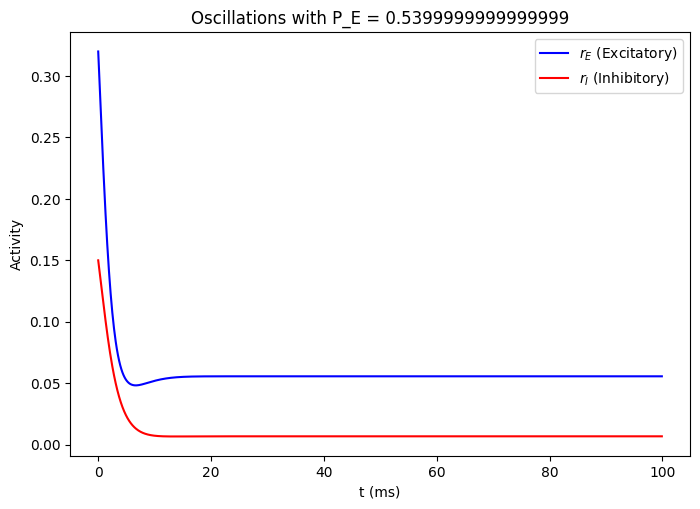

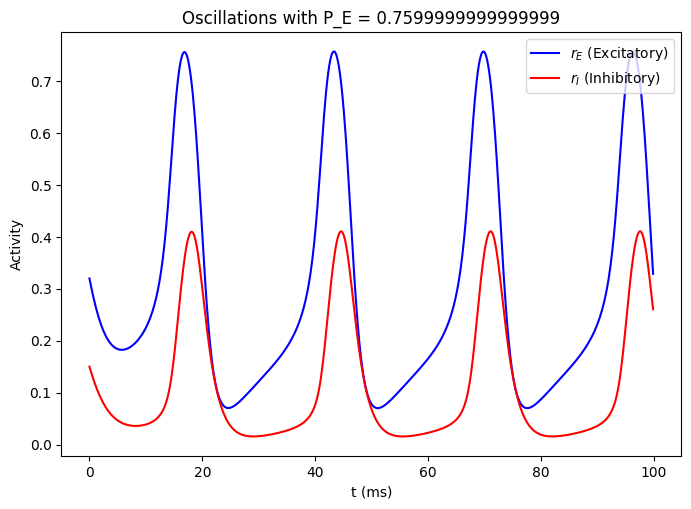

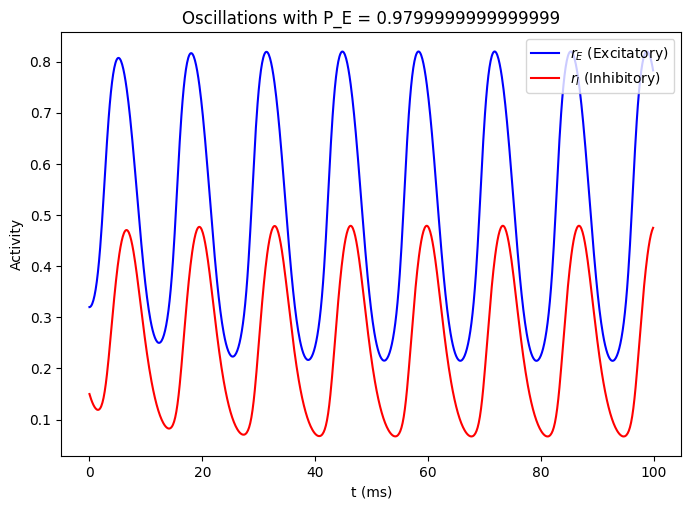

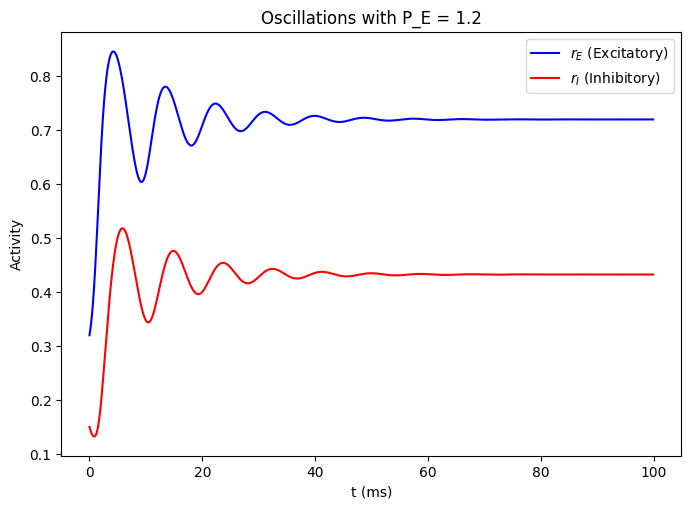

In [ ]:


# Function to test different values of P_E
def test_oscillations():
    """
    Test different values of P_E to determine when oscillations emerge.
    """

    P_E_values = np.linspace(0.1, 1.2, 6)  # Test values of P_E from 0.1 to 1.2

    for P_E in P_E_values:
        pars = default_pars(T=100.)
        pars['wEE'], pars['wEI'] = 6.4, 4.8
        pars['wIE'], pars['wII'] = 6.0, 1.2
        pars['I_ext_E'] = P_E  # Vary external input P_E
        pars['I_ext_I'] = 0  # No external input to inhibitory neurons
        pars['rE_init'], pars['rI_init'] = 0.32, 0.15

        # Simulate Wilson-Cowan equations
        rE, rI = simulate_wc(**pars)

        # Plot results
        plt.figure(figsize=(8, 5.5))
        plt.plot(pars['range_t'], rE, 'b', label=r'$r_E$ (Excitatory)')
        plt.plot(pars['range_t'], rI, 'r', label=r'$r_I$ (Inhibitory)')
        plt.xlabel('t (ms)')
        plt.ylabel('Activity')
        plt.title(f"Oscillations with P_E = {P_E}")
        plt.legend(loc='best')
        plt.show()

# Carry out the test
test_oscillations()


The simulation results provide insights into how external input ($PE$) affects the excitatory-inhibitory population dynamics in the Wilson-Cowan model. The key observations from the tests are:

* Absence of oscillations for low $PE$ values: for small values of $PE$ (e.g: 0.1, 0.32, 0.54), both excitatory and inhibitory populations exhibit a rapid decay to a stable equilibrium with minimal activity. The system does not display oscillatory behavior, indicating that the external input is insufficient to sustain a cyclic response.
* For intermediate $PE$ values (e.g: 0.75, 0.98), clear oscillations appear, where excitatory and inhibitory activity levels cyclically alternate. This suggests the presence of a limit cycle, meaning the system enters a periodic attractor where the population rates do not settle to a fixed point but instead sustain rhythmic activity. The oscillations indicate a dynamic interaction between excitatory and inhibitory populations, resembling neural rhythms observed in biological systems.
* Saturation and stabilization for high $PE$ values: at higher values (e.g: 1.2), the system initially exhibits some transient fluctuations but then stabilizes at elevated activity levels. This suggests that excessive external input disrupts the oscillatory regime, pushing the system towards a high-activity steady-state.

##**Conclusion & Final Considerations**


This analysis of the Wilson-Cowan model has provided valuable insights into the  behavior of neural populations, reinforcing the importance of dynamical systems in understanding brain activity. By exploring steady states, classifying critical points, modifying connection strengths, and introducing external inputs, we have observed some specific characteristics in the neural network dynamics.

The identification of steady states through nullcline intersections revealed multiple equilibrium points, which are very important in defining possible neural activity patterns. Depending on parameter values, the system exhibited both single and multiple stable equilibriums, highlighting the presence of different functional states within neural populations.

The stability analysis using the Jacobian matrix allowed for the classification of these equilibrium points into stable nodes, unstable nodes, or limit cycles. This classification is fundamental in determining how small perturbations influence neural behavior. Stable points correspond to robust activity states, whereas unstable or saddle points indicate transitions between states.

The exploration of gain and threshold adjustments in the model highlighted the significant role of nonlinear activation functions in shaping neural population behavior. Increasing the parameters led to sharper transitions between low and high activity states, making the system more sensitive to small perturbations. Conversely, decreasing the gain smoothed out responses, reducing sensitivity and stabilizing activity.

By altering the connection strengths, we observed significant shifts in system behavior. Increased excitatory feedback drove the system towards higher activity states, while strong inhibitory feedback suppressed activity, sometimes leading to oscillatory dynamics. These findings align with biological principles where excitation-inhibition balance is crucial for functional neural processing.

The emergence of oscillatory behavior in the system was particularly significant, as oscillations are fundamental to various neural functions, including motor coordination, sensory processing, and cognition. The results demonstrated that oscillations arise within a specific range of external input, reinforcing the idea that neural circuits require a balanced excitatory drive to sustain rhythmic activity.

The addition of external stimuli revealed how external perturbations influence the system's stability and behavior. Small external inputs shifted the location of critical points, sometimes causing bifurcations that altered the steady-state landscape. Higher external excitation tended to push the system towards higher activity levels, while inhibitory inputs dampened responses, sometimes leading to suppressed activity. These played a pivotal role in shaping system behavior, sometimes leading to bifurcations where small changes resulted in sudden shifts between activity states.

Overall, this exploration of the Wilson-Cowan model underscores the importance of nonlinear interactions in shaping neural activity. The presence of multiple stable states suggests that the brain may use such mechanisms to encode different cognitive states efficiently. Furthermore, the role of external perturbations in inducing state transitions aligns with observed neural responses in sensory processing.

